In [1]:
!pip install yfinance
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import yfinance as yf              # a popular open source library to access the financial data available on Yahoo Finance
import matplotlib.pyplot as plt
import mplfinance as mpf           # a financial charting library of matplotlib

**STEPS:**
2.   Read the daily confirmed cases and deaths into two dataframes can be found at this github page:


> a)	Confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"




  > b)	deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"


3. Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level






In [3]:
# URLs for confirmed cases and deaths data of COVID-19
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into DataFrames
confirmed_cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(deaths_url)


In [4]:
confirmed_cases.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [6]:
# Convert the date columns of confirmed_cases into a proper datetime format for further analysis and visualization.
confirmed_cases_format = confirmed_cases.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Confirmed"
)
confirmed_cases_format["Date"] = pd.to_datetime(confirmed_cases_format["Date"])
confirmed_cases_format.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_41428\2658637181.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_cases_format["Date"] = pd.to_datetime(confirmed_cases_format["Date"])


,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0


In [7]:
# Convert the date columns of deaths into a proper datetime format for further analysis and visualization.
deaths_format = deaths.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Deaths"
)
deaths_format["Date"] = pd.to_datetime(deaths_format["Date"])
deaths_format.head()



C:\Users\Admin\AppData\Local\Temp\ipykernel_41428\3494799303.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_format["Date"] = pd.to_datetime(deaths_format["Date"])


,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0



4. Research a stock for each below that reflects the following industries (it will be used in the next step):

> a) Overall American Market

> b) Overall Canadian Market

> c) Travel sector

> d) The Real Estate sector

> e) Precious metals (Gold, Silver, Platinum, etc)

5. Use AlphaVantage or other website to get the daily high and low prices for your selected stocks


In [8]:
import pandas as pd
import yfinance as yf

# Define the stocks and their symbols
stocks = {
    'S&P/TSX Composite index': '^GSPTSE',    # representing roughly 70% of the total market capitalization on the Toronto Stock Exchange
    'Pfizer': 'PFE',                         # an American multinational pharmaceutical corporation that developed the Covid-19 vaccine
    'Canadian Tire': 'CTC.TO',                # Canadian Tire, a stock of Canada Market, Toronto Stock Exchange
    'Air Canada': 'AC.TO',                    # Air Canada, Toronto Stock Exchange - Travel sector
    'Choice Properties REIT': 'CHP-UN.TO',    # Choice Properties REIT, Toronto Stock Exchange - The Real Estate sector
    'SPDR Gold Trust ETF': 'GLD'              # SPDR Gold Trust ETF - Precious metals
}

# Define the date range (from start_date to the date before end_date)
start_date = '2020-01-22'
end_date = '2023-03-09'

# Create an empty DataFrame to store the data
stock_data = pd.DataFrame()

# Loop through the stocks
for stock_name, symbol in stocks.items():
    # Fetch historical stock data using yfinance
    data = yf.download(symbol, start=start_date, end=end_date)

    # Add 'Stock' and 'Symbol' columns
    data['Stock'] = stock_name
    data['Symbol'] = symbol

    # Append data to the DataFrame
    stock_data = pd.concat([stock_data, data[['Stock', 'Symbol', 'High', 'Low', 'Open', 'Close']]])

# Save the DataFrame to a CSV file
stock_data.to_csv('stock_data.csv', index=True)

# Display the DataFrame
stock_data


C:\Users\Admin\AppData\Local\Temp\ipykernel_41428\2847012167.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_41428\2847012167.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)

C:\Users\Admin\AppData\Local\Temp\ipykernel_41428\2847012167.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_41428\2847012167.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)

C:\Users\Admin\AppData\Local\Tem

Price,Stock,Symbol,High,Low,Open,Close,High,Low,Open,Close,...,Open,Close,High,Low,Open,Close,High,Low,Open,Close
Ticker,,,^GSPTSE,^GSPTSE,^GSPTSE,^GSPTSE,PFE,PFE,PFE,PFE,...,AC.TO,AC.TO,CHP-UN.TO,CHP-UN.TO,CHP-UN.TO,CHP-UN.TO,GLD,GLD,GLD,GLD
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,S&P/TSX Composite index,^GSPTSE,17666.500000,17558.000000,17570.300781,17599.900391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,S&P/TSX Composite index,^GSPTSE,17621.800781,17540.800781,17564.800781,17621.800781,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,S&P/TSX Composite index,^GSPTSE,17646.400391,17514.699219,17629.400391,17565.300781,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,S&P/TSX Composite index,^GSPTSE,17466.099609,17360.000000,17376.800781,17442.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,S&P/TSX Composite index,^GSPTSE,17519.000000,17456.099609,17475.000000,17500.900391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-02,SPDR Gold Trust ETF,GLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,170.979996,170.360001,170.520004,170.660004
2023-03-03,SPDR Gold Trust ETF,GLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,172.600006,170.979996,171.449997,172.490005


**Insight**: From end of Mar 2020 to end of Jun 2021, there is a strong positive correlation between S&P/TSX Composite index and number of Covid-19 confirmed cases.


6. Combine COVID-19 and Stock Market Data

• Append the stock market data to the COVID-19 aggregated dataframe.

• Align stock prices and COVID-19 data by date to allow for meaningful comparisons.



In [9]:
# Append the stock market data to the COVID-19 aggregated dataframe from end of Mar 2020 to end of Jun 2021
stock_data_filtered = stock_data[(stock_data.index >= '2020-03-31') & (stock_data.index <= '2021-06-30')]

# Flatten the multi-level columns
stock_data_filtered.columns = ['_'.join(col).strip('_') for col in stock_data_filtered.columns.values]

covid_stock_data = confirmed_cases_format.merge(
    stock_data_filtered,
    left_on='Date',
    right_index=True,
    how='inner'
)
covid_stock_data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Stock,Symbol,High_^GSPTSE,Low_^GSPTSE,...,Open_AC.TO,Close_AC.TO,High_CHP-UN.TO,Low_CHP-UN.TO,Open_CHP-UN.TO,Close_CHP-UN.TO,High_GLD,Low_GLD,Open_GLD,Close_GLD
19941,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,S&P/TSX Composite index,^GSPTSE,13557.599609,13083.900391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19941,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,Pfizer,PFE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19941,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,Canadian Tire,CTC.TO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19941,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,Air Canada,AC.TO,NaN,NaN,...,16.27,15.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19941,NaN,Afghanistan,33.93911,67.709953,2020-03-31,166,Choice Properties REIT,CHP-UN.TO,NaN,NaN,...,NaN,NaN,9.750883,9.13402,9.163748,9.602242,NaN,NaN,NaN,NaN


Step 6: Create Visualizations
Using the provided dataset containing global COVID-19 statistics and stock price data (Date, High, Low, Ticker, Confirmed, Deaths), create the following visualizations:



1. Line Graphs:
   - Show trends in global confirmed cases and deaths over time.
   - Plot stock prices (high and low) over time for each selected stock.

Date range: 2020-01-22 to 2023-03-09
Total confirmed cases: 676,570,149
Total deaths: 6,881,802


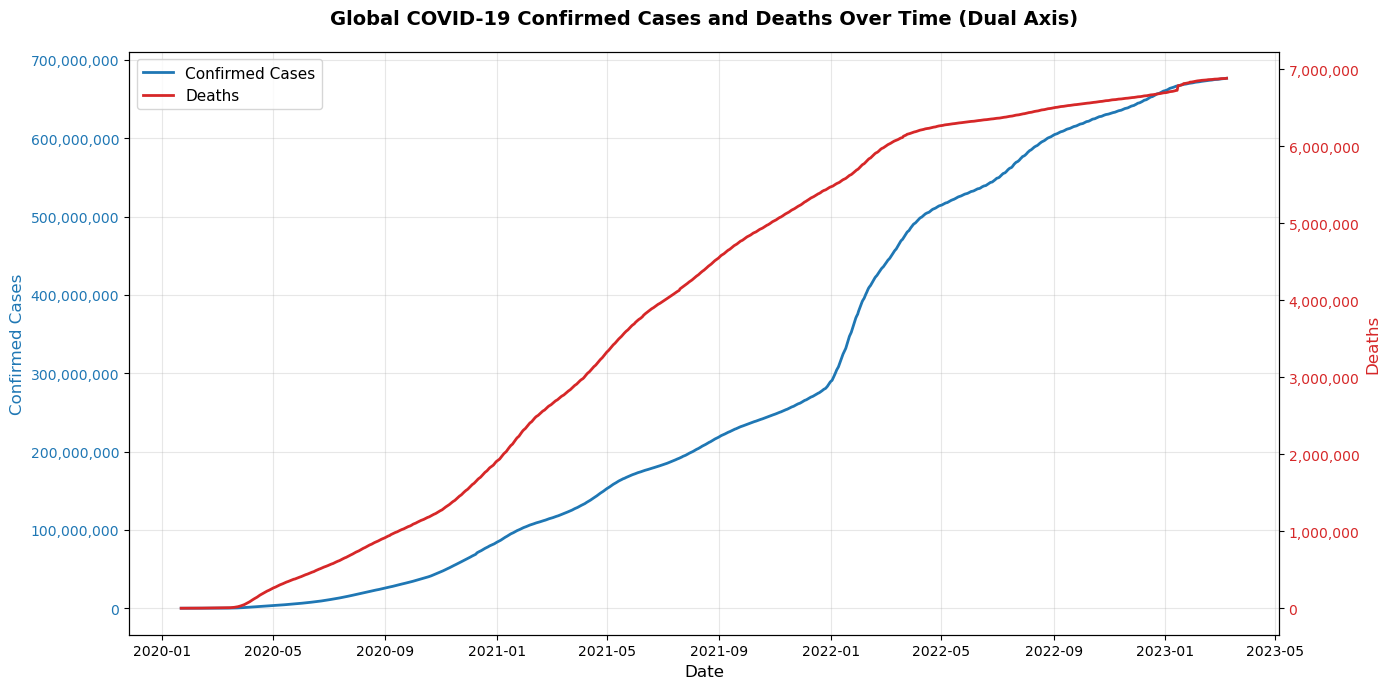

In [10]:
# 1. Line Graphs:
#  Show trends in global confirmed cases and deaths over time get total countries data
import matplotlib.ticker as ticker

global_confirmed = confirmed_cases_format.groupby('Date')['Confirmed'].sum().reset_index()
global_deaths = deaths_format.groupby('Date')['Deaths'].sum().reset_index()

print(f"Date range: {global_confirmed['Date'].min().strftime('%Y-%m-%d')} to {global_confirmed['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total confirmed cases: {global_confirmed['Confirmed'].max():,}")
print(f"Total deaths: {global_deaths['Deaths'].max():,}")

# Create figure with dual y-axes to show both scales properly
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot confirmed cases on left y-axis
color = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Confirmed Cases', color=color, fontsize=12)
ax1.plot(global_confirmed['Date'], global_confirmed['Confirmed'], 
         label='Confirmed Cases', color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Format left y-axis with comma separators
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Create second y-axis for deaths
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Deaths', color=color, fontsize=12)
ax2.plot(global_deaths['Date'], global_deaths['Deaths'], 
         label='Deaths', color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Format right y-axis with comma separators
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add title and legends
plt.title('Global COVID-19 Confirmed Cases and Deaths Over Time (Dual Axis)', 
          fontsize=14, fontweight='bold', pad=20)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

fig.tight_layout()
plt.show()


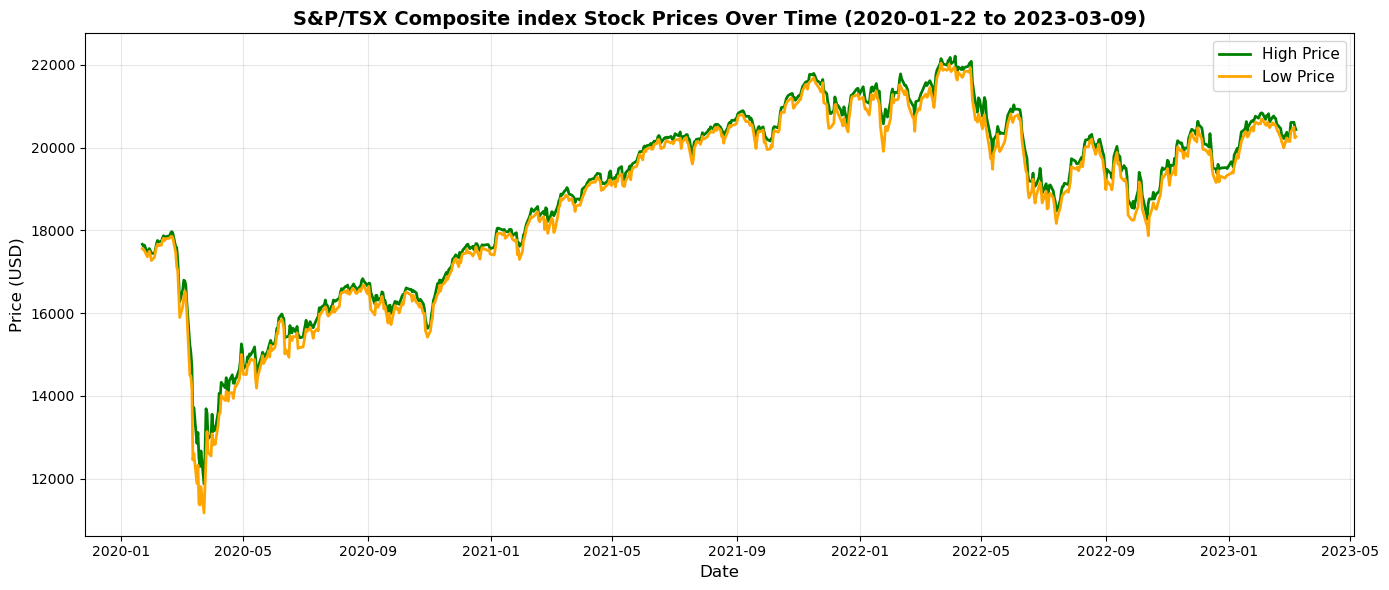

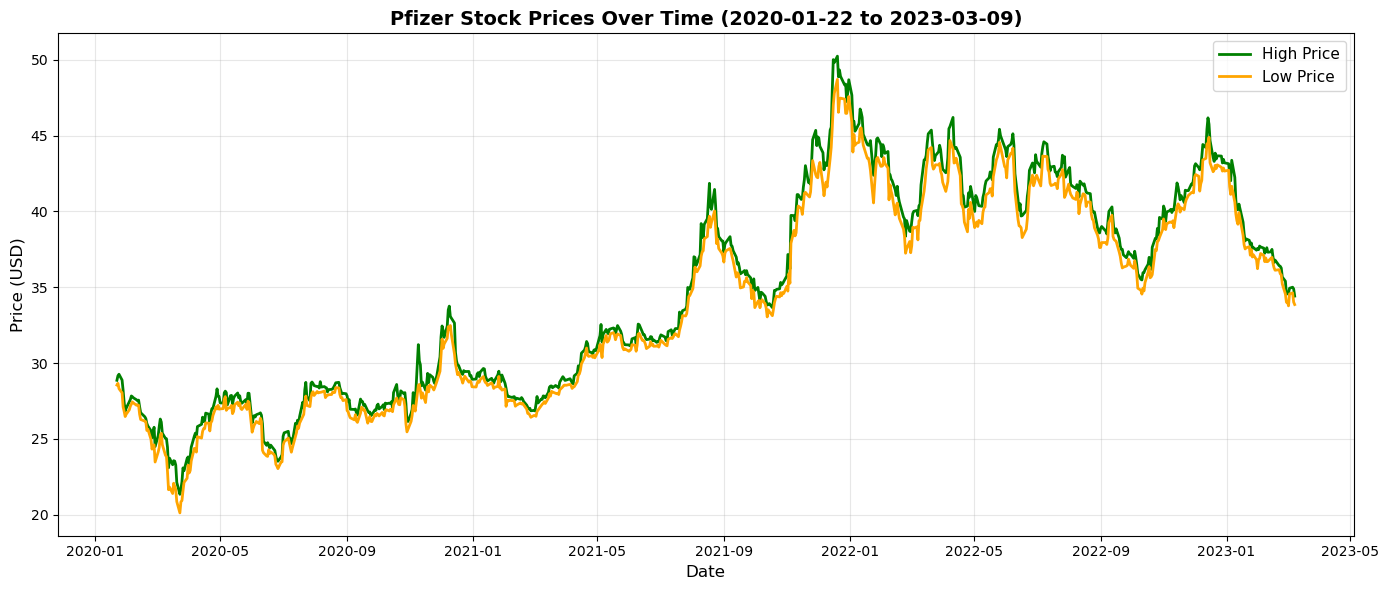

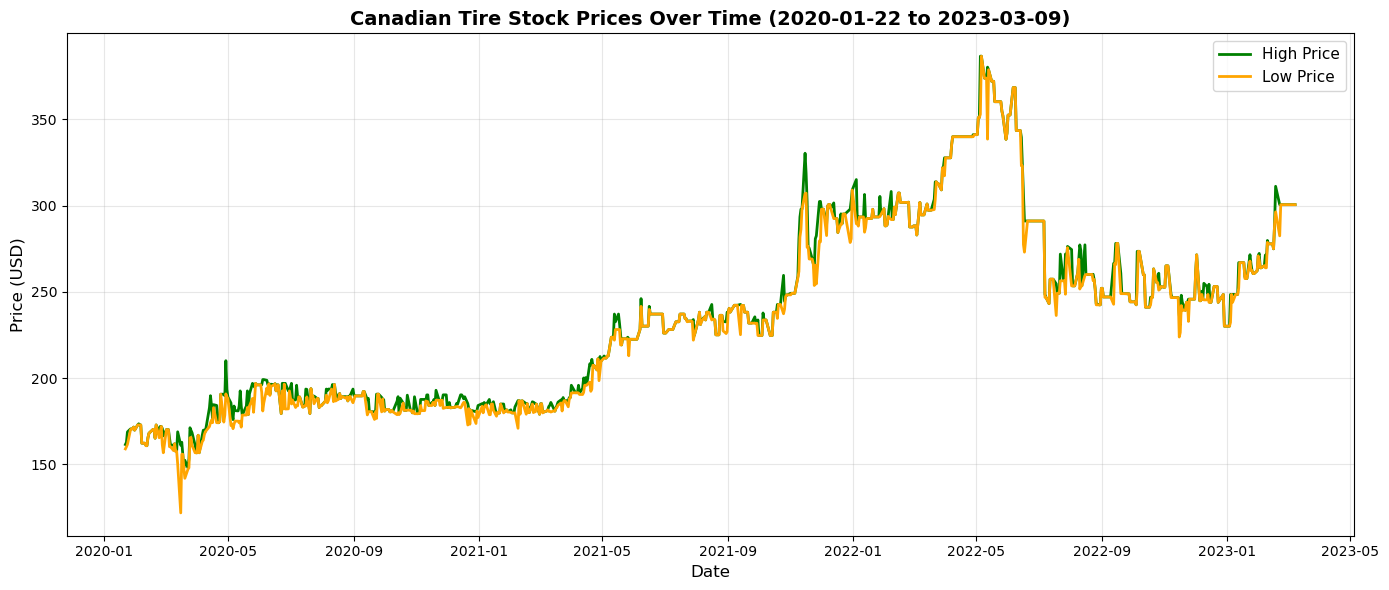

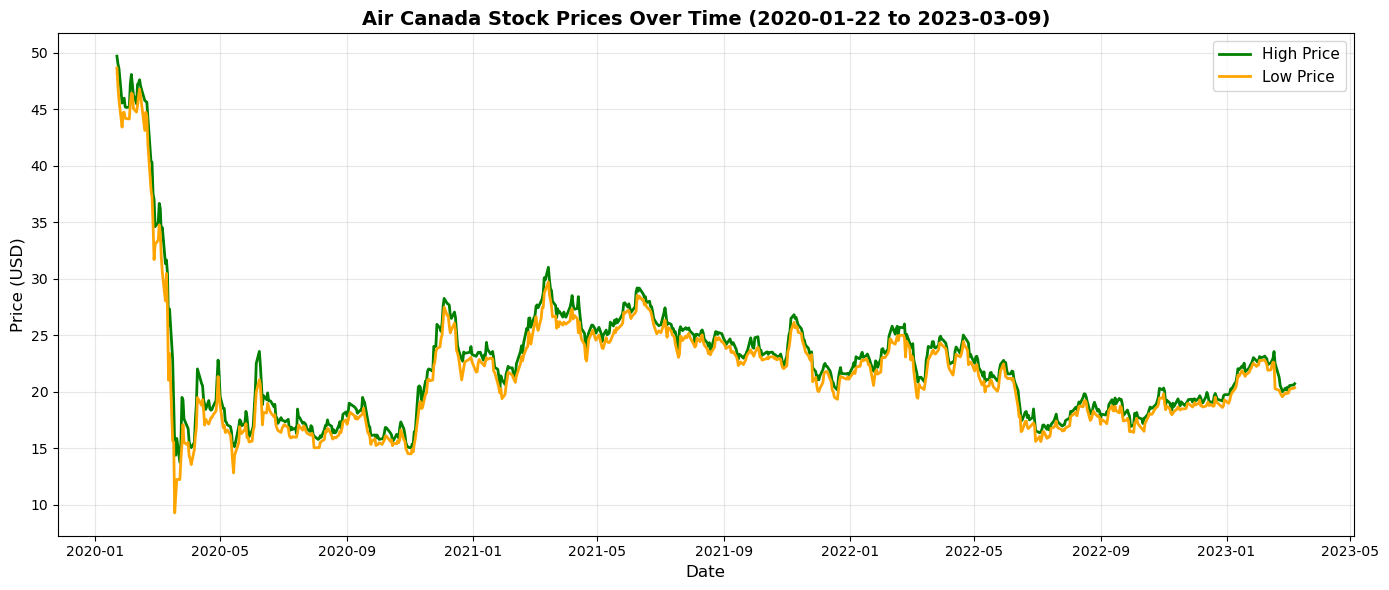

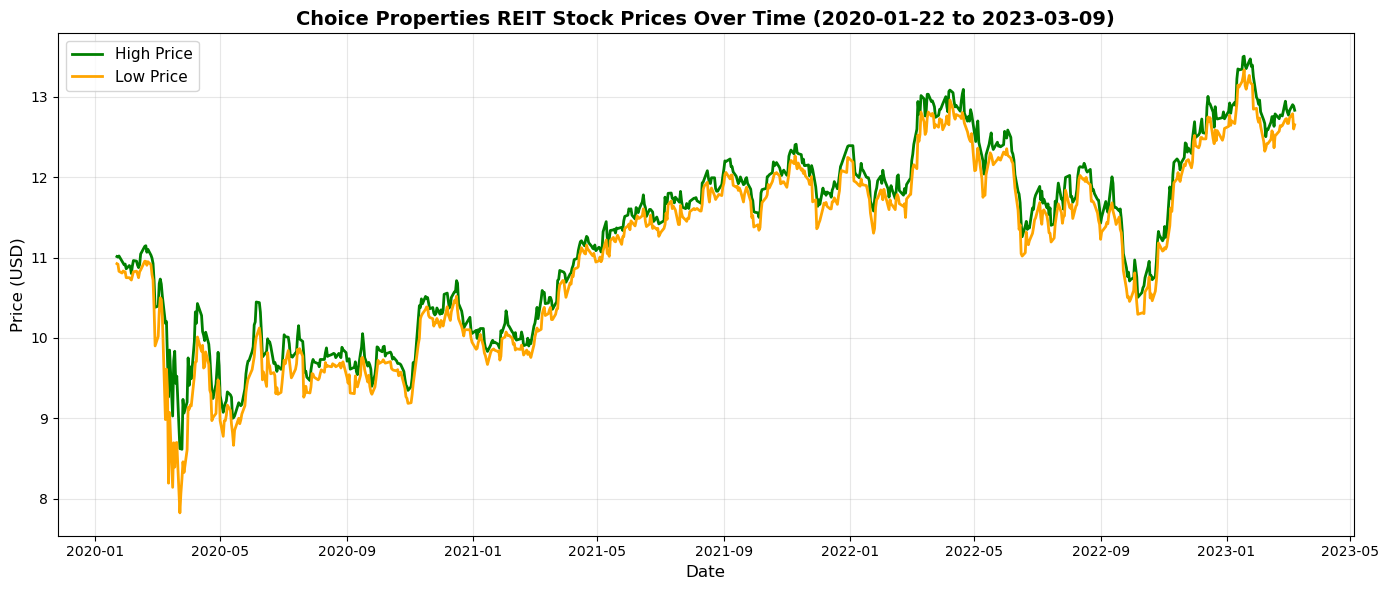

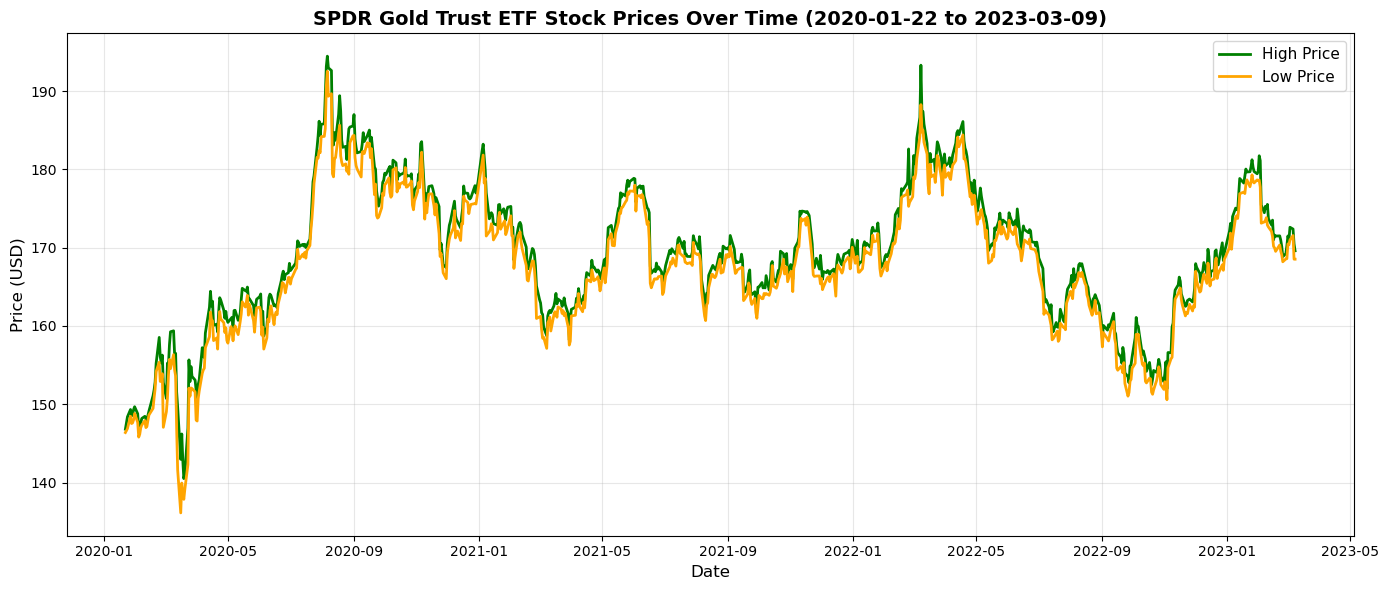

In [11]:
# Plot stock prices (high and low) over time for each selected stock.
# Filter stock data to match the COVID-19 date range (2020-01-22 to 2023-03-09)
stock_data_filtered = stock_data[(stock_data.index >= '2020-01-22') & (stock_data.index <= '2023-03-09')]

# Flatten the multi-level columns if needed
if isinstance(stock_data_filtered.columns, pd.MultiIndex):
    stock_data_filtered.columns = ['_'.join(col).strip('_') for col in stock_data_filtered.columns.values]

for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name]
    
    # Handle column names that may or may not have the symbol suffix
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    
    plt.figure(figsize=(14, 6))
    plt.plot(stock_df.index, stock_df[high_col], label='High Price', color='green', linewidth=2)
    plt.plot(stock_df.index, stock_df[low_col], label='Low Price', color='orange', linewidth=2)
    plt.title(f'{stock_name} Stock Prices Over Time (2020-01-22 to 2023-03-09)', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


2. Histograms:
   - Display the distribution of daily changes in stock prices (e.g., daily highs minus daily lows).


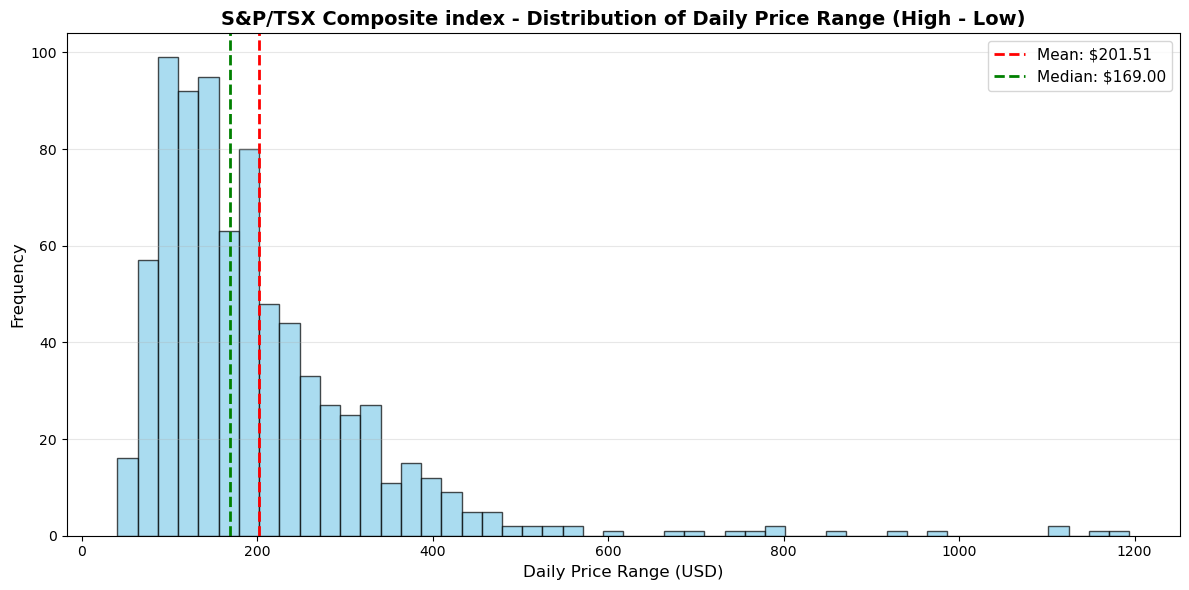


S&P/TSX Composite index Statistics:
  Mean Daily Range: $201.51
  Median Daily Range: $169.00
  Min Daily Range: $40.60
  Max Daily Range: $1194.10
  Std Dev: $135.88


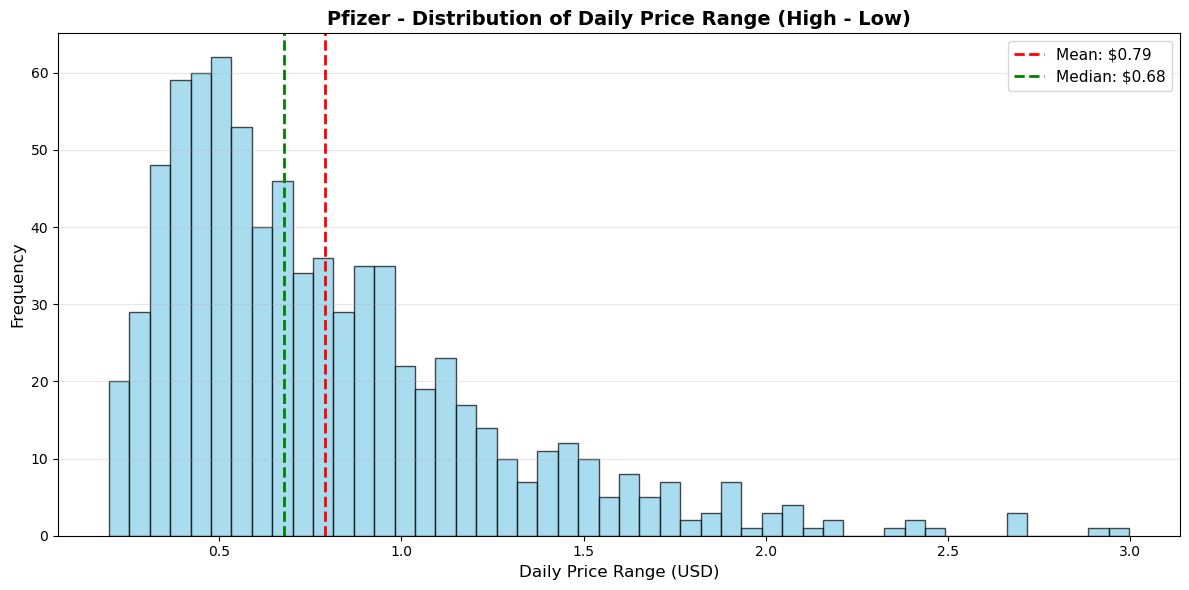


Pfizer Statistics:
  Mean Daily Range: $0.79
  Median Daily Range: $0.68
  Min Daily Range: $0.20
  Max Daily Range: $3.00
  Std Dev: $0.45


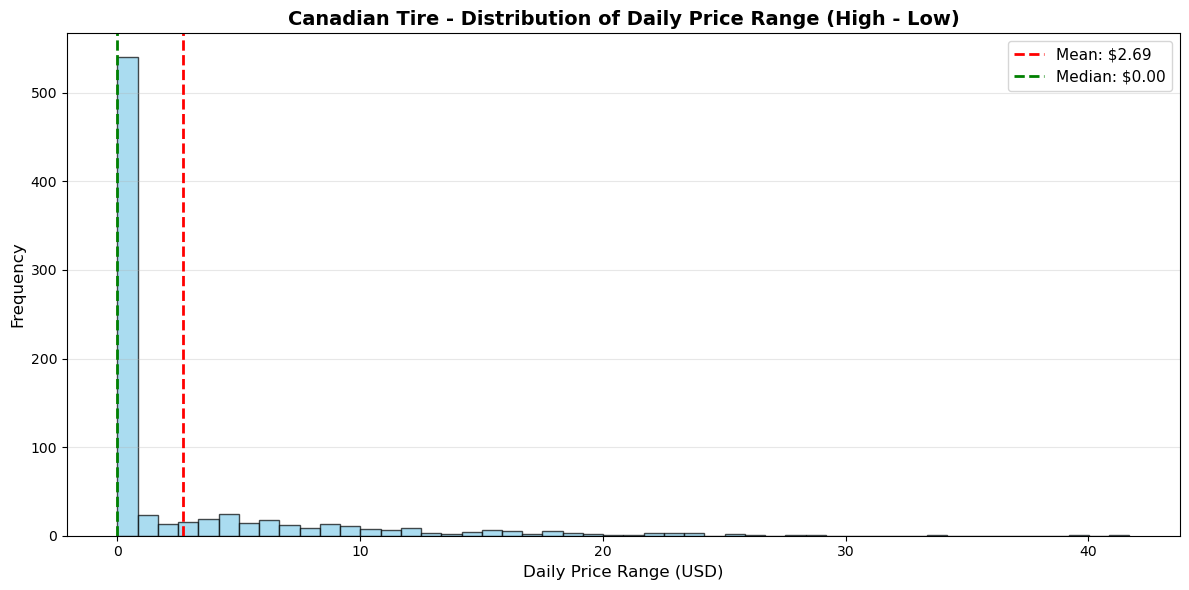


Canadian Tire Statistics:
  Mean Daily Range: $2.69
  Median Daily Range: $0.00
  Min Daily Range: $0.00
  Max Daily Range: $41.70
  Std Dev: $5.59


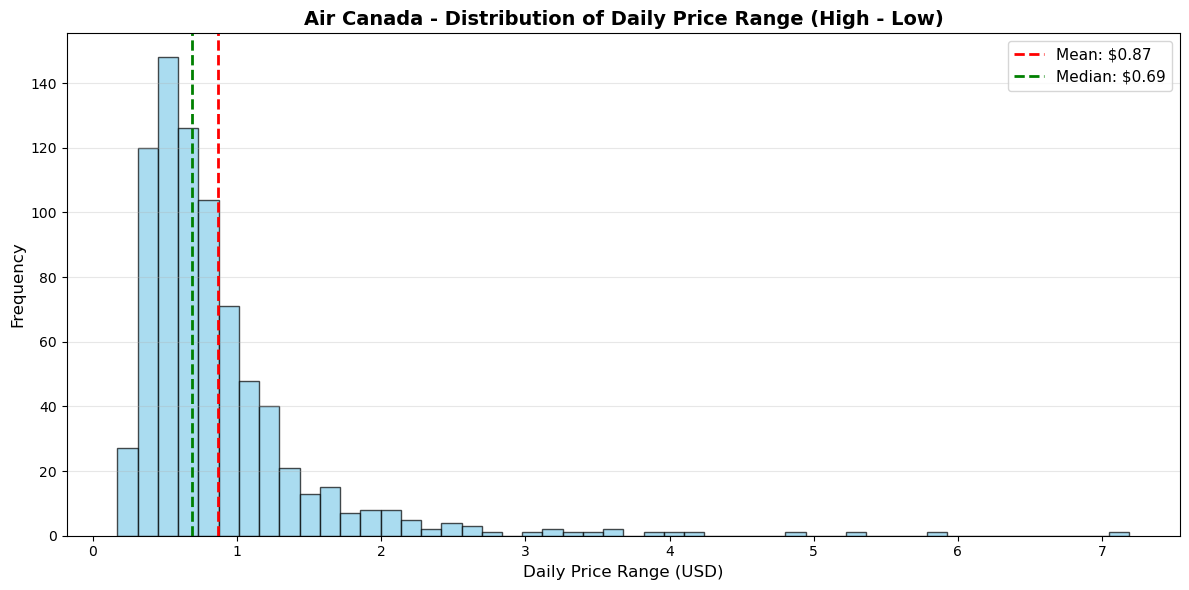


Air Canada Statistics:
  Mean Daily Range: $0.87
  Median Daily Range: $0.69
  Min Daily Range: $0.17
  Max Daily Range: $7.19
  Std Dev: $0.65


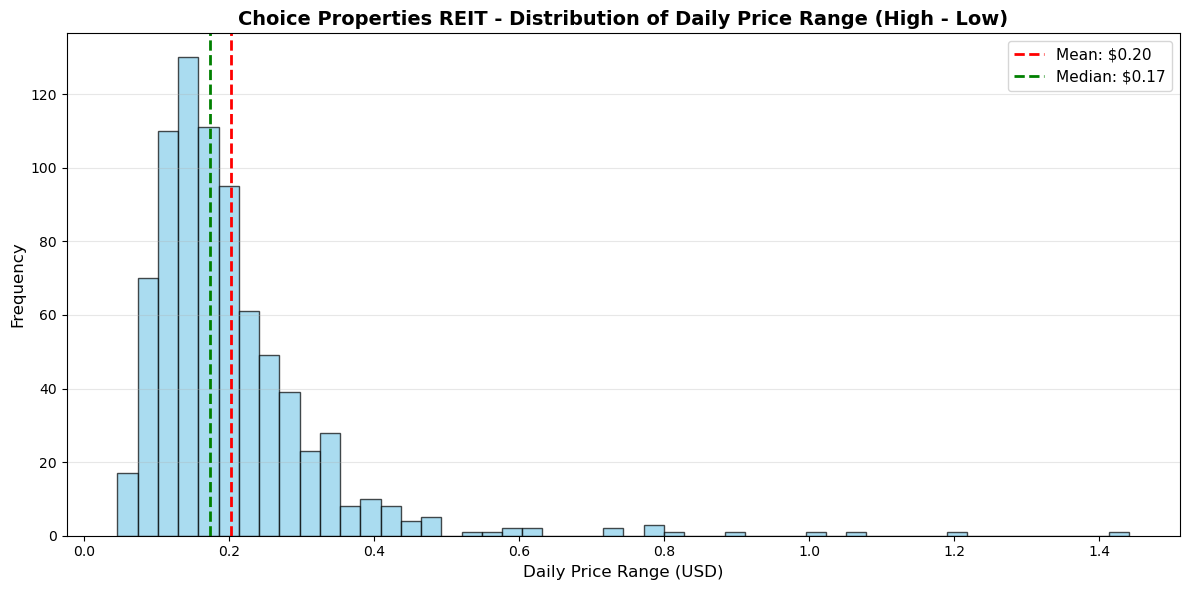


Choice Properties REIT Statistics:
  Mean Daily Range: $0.20
  Median Daily Range: $0.17
  Min Daily Range: $0.05
  Max Daily Range: $1.44
  Std Dev: $0.13


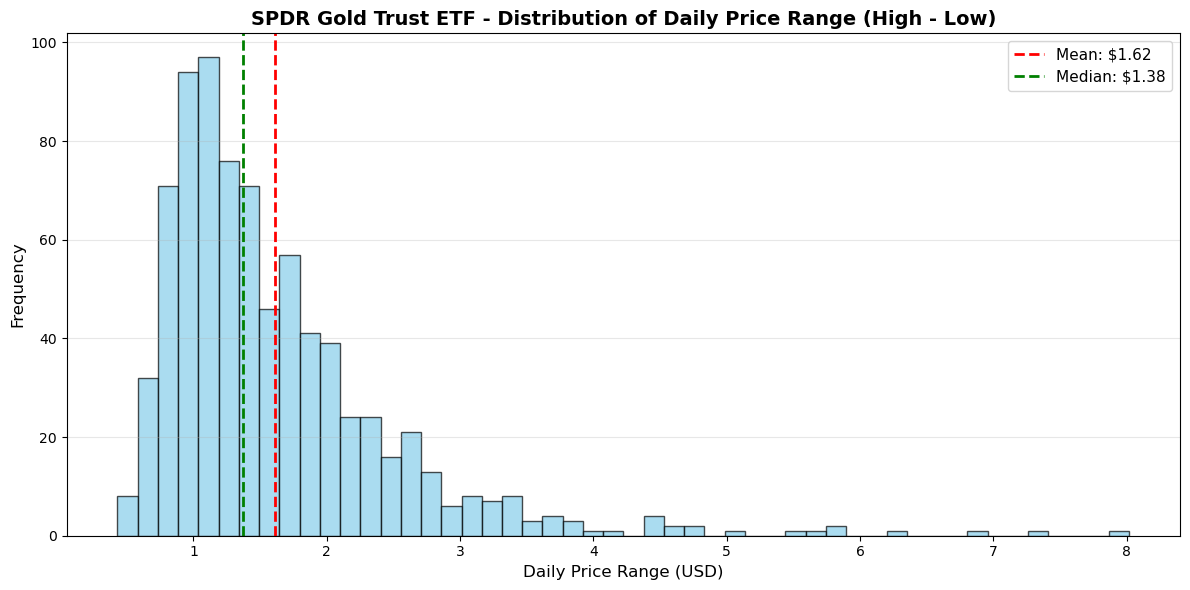


SPDR Gold Trust ETF Statistics:
  Mean Daily Range: $1.62
  Median Daily Range: $1.38
  Min Daily Range: $0.43
  Max Daily Range: $8.02
  Std Dev: $0.90


In [12]:
for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name].copy()
    
    # Handle column names that may or may not have the symbol suffix
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    
    # Calculate daily price range (High - Low)
    stock_df['Daily_Range'] = stock_df[high_col] - stock_df[low_col]
    
    # Create histogram
    plt.figure(figsize=(12, 6))
    plt.hist(stock_df['Daily_Range'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'{stock_name} - Distribution of Daily Price Range (High - Low)', fontsize=14, fontweight='bold')
    plt.xlabel('Daily Price Range (USD)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add statistics
    mean_range = stock_df['Daily_Range'].mean()
    median_range = stock_df['Daily_Range'].median()
    plt.axvline(mean_range, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_range:.2f}')
    plt.axvline(median_range, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_range:.2f}')
    
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()
    
    print(f"\n{stock_name} Statistics:")
    print(f"  Mean Daily Range: ${mean_range:.2f}")
    print(f"  Median Daily Range: ${median_range:.2f}")
    print(f"  Min Daily Range: ${stock_df['Daily_Range'].min():.2f}")
    print(f"  Max Daily Range: ${stock_df['Daily_Range'].max():.2f}")
    print(f"  Std Dev: ${stock_df['Daily_Range'].std():.2f}")


3. Boxplots:
   - Construct boxplots comparing the price variability of stocks across different industries or tickers using the High, Low, or daily price range values.


C:\Users\Admin\AppData\Local\Temp\ipykernel_41428\3687467482.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = plt.boxplot([boxplot_df[boxplot_df['Stock'] == stock]['Daily_Range'].values


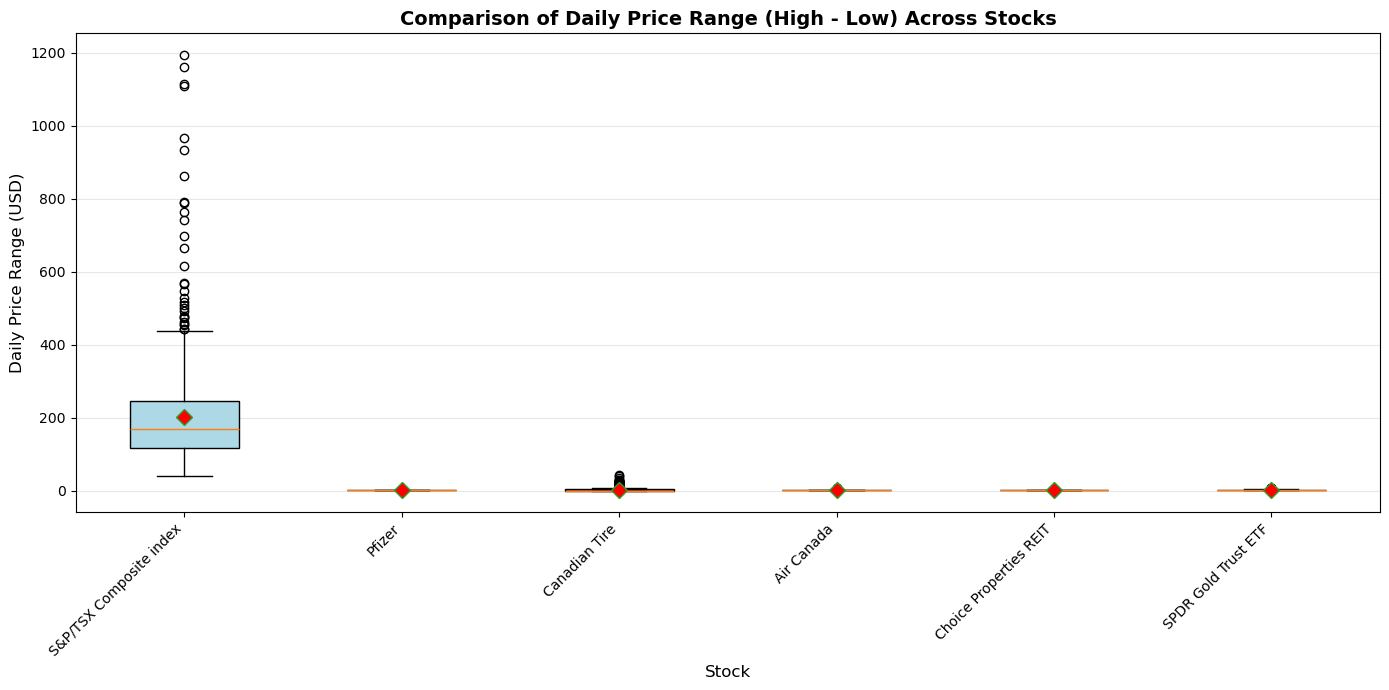

C:\Users\Admin\AppData\Local\Temp\ipykernel_41428\3687467482.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = plt.boxplot(high_data, labels=high_labels, patch_artist=True,


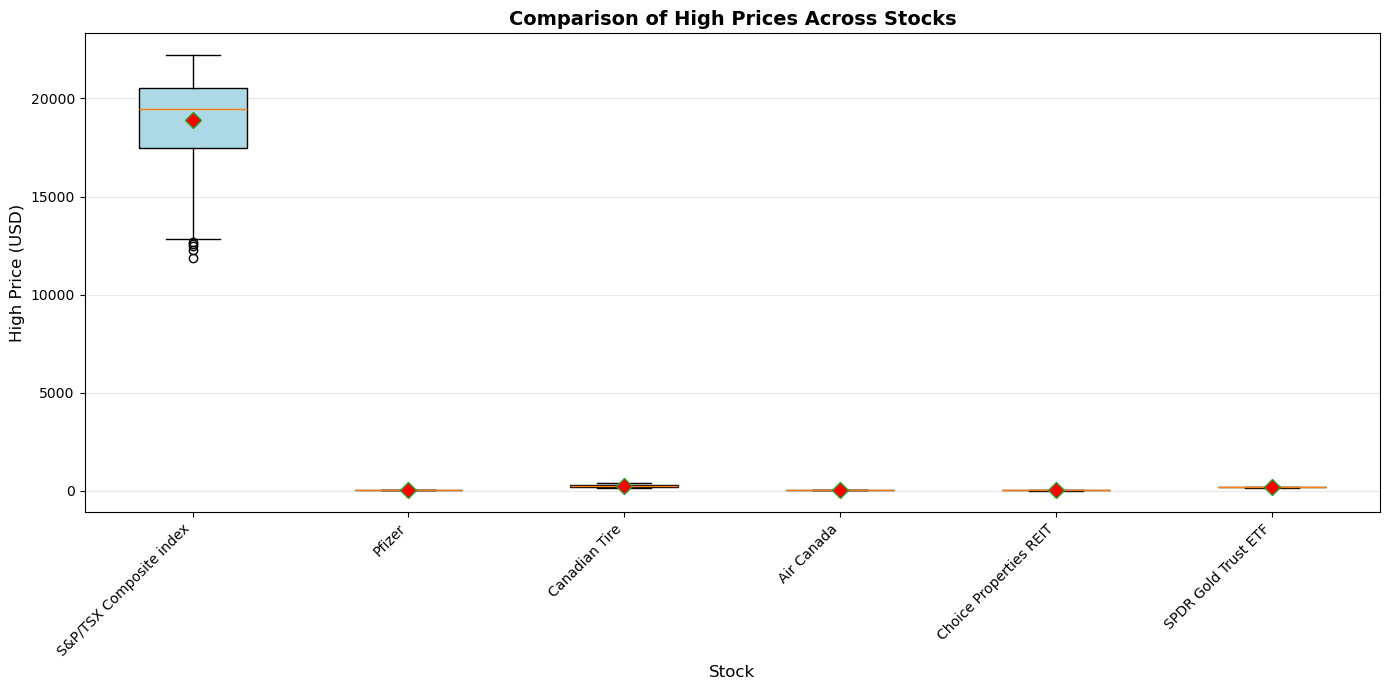

C:\Users\Admin\AppData\Local\Temp\ipykernel_41428\3687467482.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = plt.boxplot(low_data, labels=low_labels, patch_artist=True,


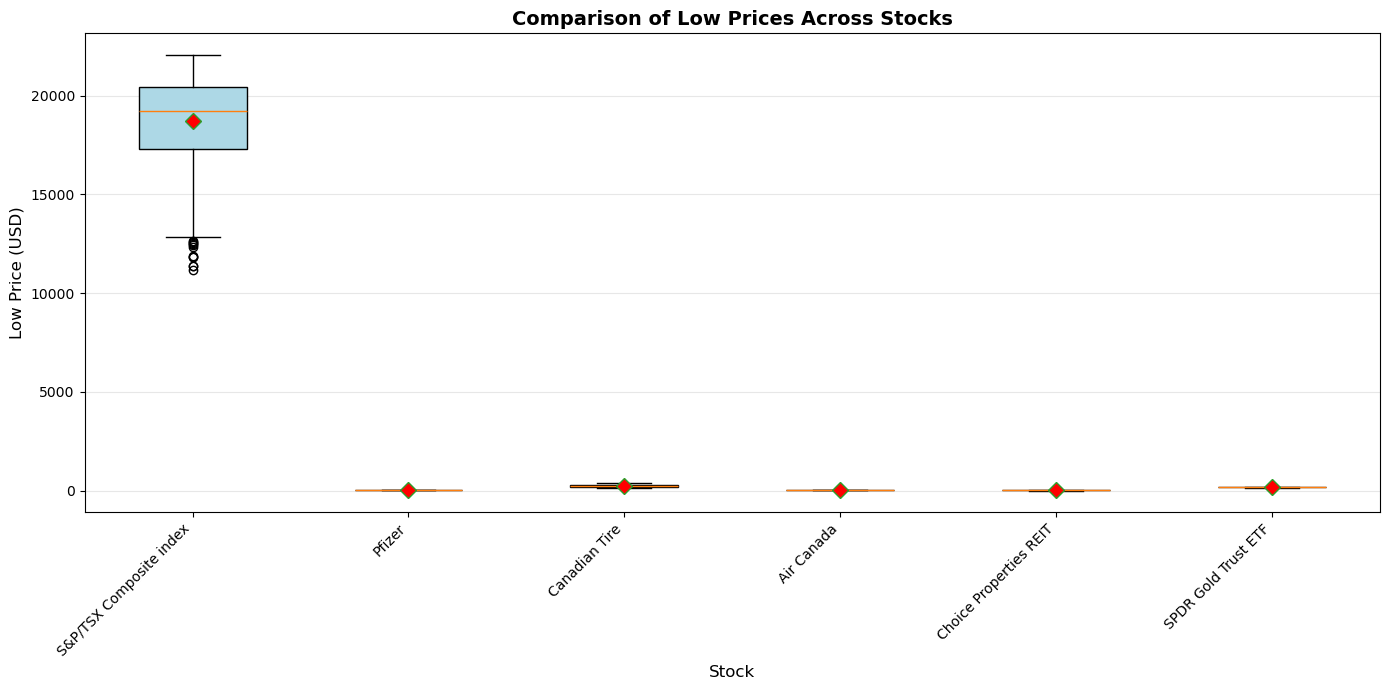


Price Variability Summary:

S&P/TSX Composite index:
  High Price - Mean: $18889.79, Std: $2188.20
  Low Price  - Mean: $18688.27, Std: $2226.65
  Daily Range - Mean: $201.51, Std: $135.88

Pfizer:
  High Price - Mean: $34.66, Std: $6.91
  Low Price  - Mean: $33.86, Std: $6.70
  Daily Range - Mean: $0.79, Std: $0.45

Canadian Tire:
  High Price - Mean: $235.63, Std: $52.67
  Low Price  - Mean: $232.94, Std: $52.84
  Daily Range - Mean: $2.69, Std: $5.59

Air Canada:
  High Price - Mean: $22.50, Std: $5.69
  Low Price  - Mean: $21.63, Std: $5.56
  Daily Range - Mean: $0.87, Std: $0.65

Choice Properties REIT:
  High Price - Mean: $11.24, Std: $1.13
  Low Price  - Mean: $11.04, Std: $1.16
  Daily Range - Mean: $0.20, Std: $0.13

SPDR Gold Trust ETF:
  High Price - Mean: $169.13, Std: $9.04
  Low Price  - Mean: $167.51, Std: $9.02
  Daily Range - Mean: $1.62, Std: $0.90


In [13]:
# Prepare data for boxplots
stock_ranges = []
stock_names = []
stock_highs = []
stock_lows = []

for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name].copy()
    
    # Handle column names
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    
    # Calculate daily price range
    daily_ranges = (stock_df[high_col] - stock_df[low_col]).dropna()
    
    # Append data
    stock_ranges.extend(daily_ranges.tolist())
    stock_names.extend([stock_name] * len(daily_ranges))
    stock_highs.extend(stock_df[high_col].dropna().tolist())
    stock_lows.extend(stock_df[low_col].dropna().tolist())

# Create DataFrame for plotting
boxplot_df = pd.DataFrame({
    'Stock': stock_names,
    'Daily_Range': stock_ranges
})

# Boxplot 1: Daily Price Range comparison
plt.figure(figsize=(14, 7))
box_parts = plt.boxplot([boxplot_df[boxplot_df['Stock'] == stock]['Daily_Range'].values 
                          for stock in stocks.keys()],
                         labels=list(stocks.keys()),
                         patch_artist=True,
                         showmeans=True,
                         meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lavender']
for patch, color in zip(box_parts['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparison of Daily Price Range (High - Low) Across Stocks', fontsize=14, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Daily Price Range (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Boxplot 2: High Prices comparison
high_data = []
high_labels = []
for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name]
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    high_data.append(stock_df[high_col].dropna().values)
    high_labels.append(stock_name)

plt.figure(figsize=(14, 7))
box_parts = plt.boxplot(high_data, labels=high_labels, patch_artist=True, 
                         showmeans=True, meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

for patch, color in zip(box_parts['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparison of High Prices Across Stocks', fontsize=14, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('High Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Boxplot 3: Low Prices comparison
low_data = []
low_labels = []
for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name]
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    low_data.append(stock_df[low_col].dropna().values)
    low_labels.append(stock_name)

plt.figure(figsize=(14, 7))
box_parts = plt.boxplot(low_data, labels=low_labels, patch_artist=True, 
                         showmeans=True, meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

for patch, color in zip(box_parts['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparison of Low Prices Across Stocks', fontsize=14, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Low Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPrice Variability Summary:")
print("="*80)
for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name]
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    daily_range = stock_df[high_col] - stock_df[low_col]
    
    print(f"\n{stock_name}:")
    print(f"  High Price - Mean: ${stock_df[high_col].mean():.2f}, Std: ${stock_df[high_col].std():.2f}")
    print(f"  Low Price  - Mean: ${stock_df[low_col].mean():.2f}, Std: ${stock_df[low_col].std():.2f}")
    print(f"  Daily Range - Mean: ${daily_range.mean():.2f}, Std: ${daily_range.std():.2f}")


4. Scatter Plots:
   - Produce scatter plots to analyze potential relationships between COVID-19 global cases (Confirmed or Deaths) and stock prices for selected industries or tickers.


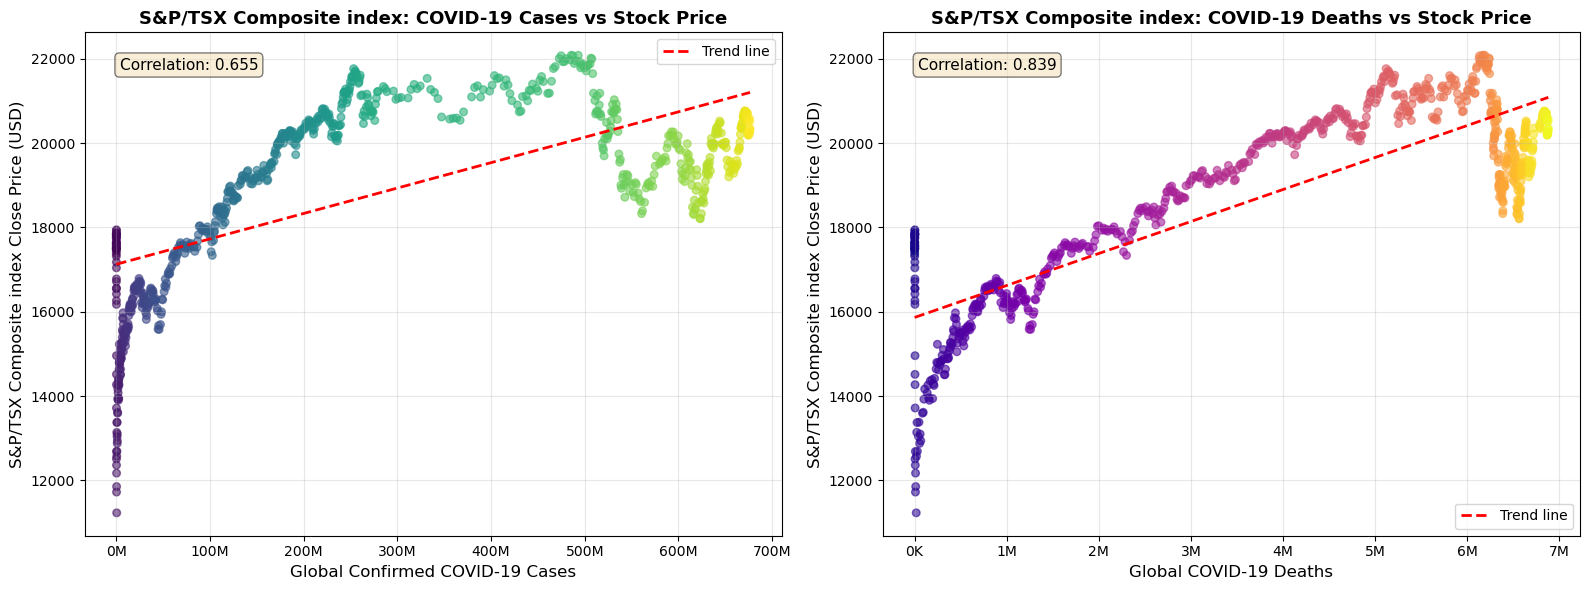


S&P/TSX Composite index Correlation Analysis:
  Confirmed Cases vs Close Price: 0.6545
  Deaths vs Close Price: 0.8387
  Data points: 785
  Date range: 2020-01-22 to 2023-03-08


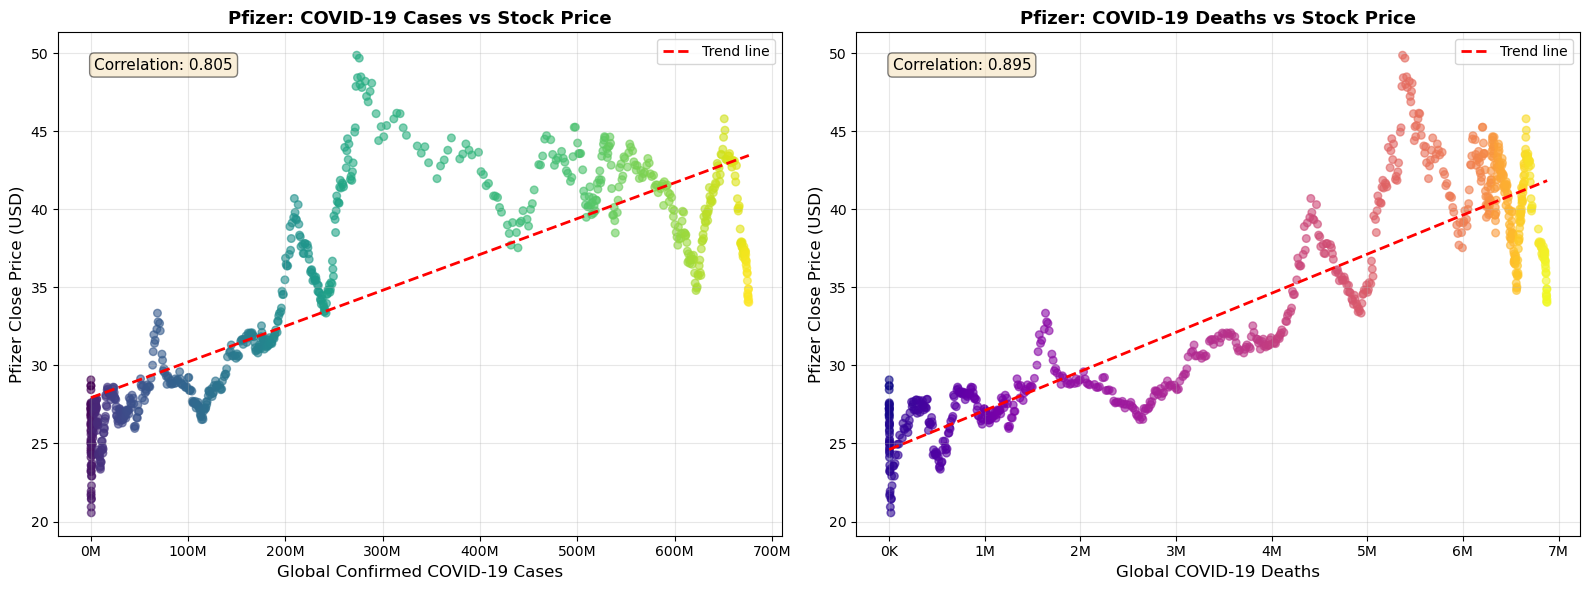


Pfizer Correlation Analysis:
  Confirmed Cases vs Close Price: 0.8053
  Deaths vs Close Price: 0.8947
  Data points: 788
  Date range: 2020-01-22 to 2023-03-08


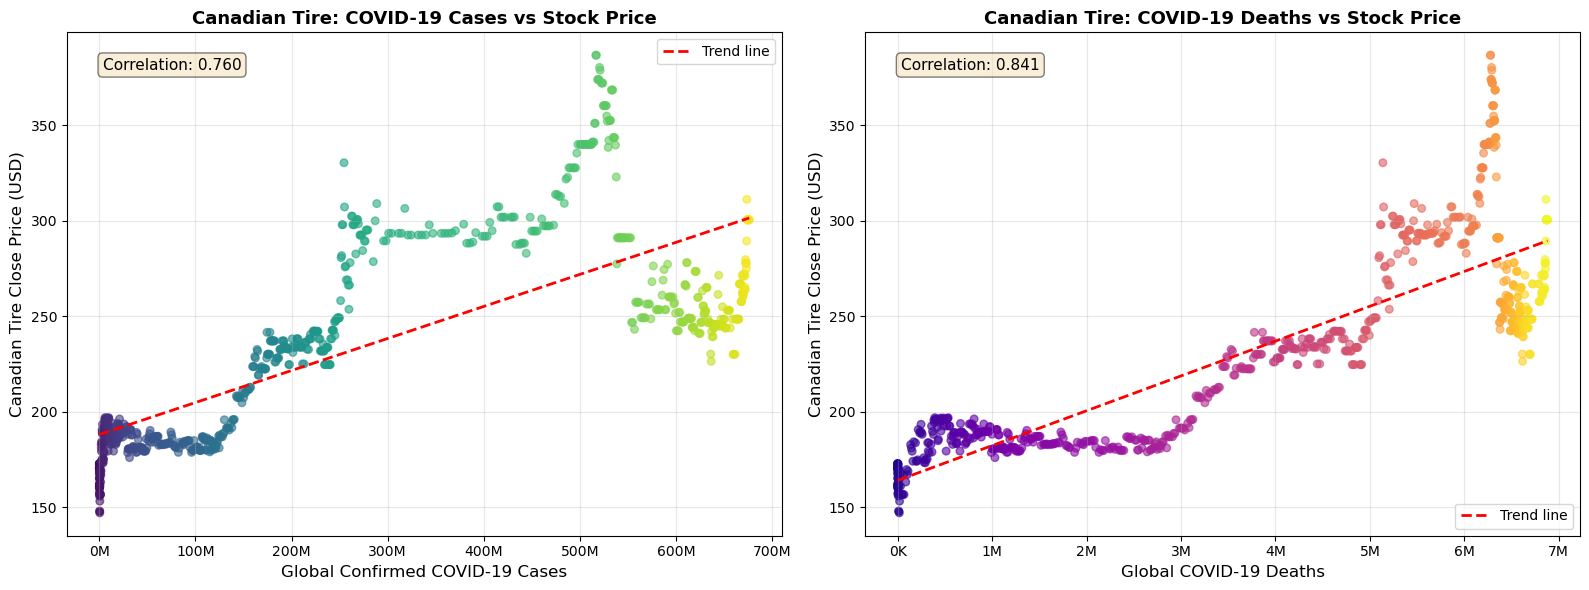


Canadian Tire Correlation Analysis:
  Confirmed Cases vs Close Price: 0.7602
  Deaths vs Close Price: 0.8415
  Data points: 785
  Date range: 2020-01-22 to 2023-03-08


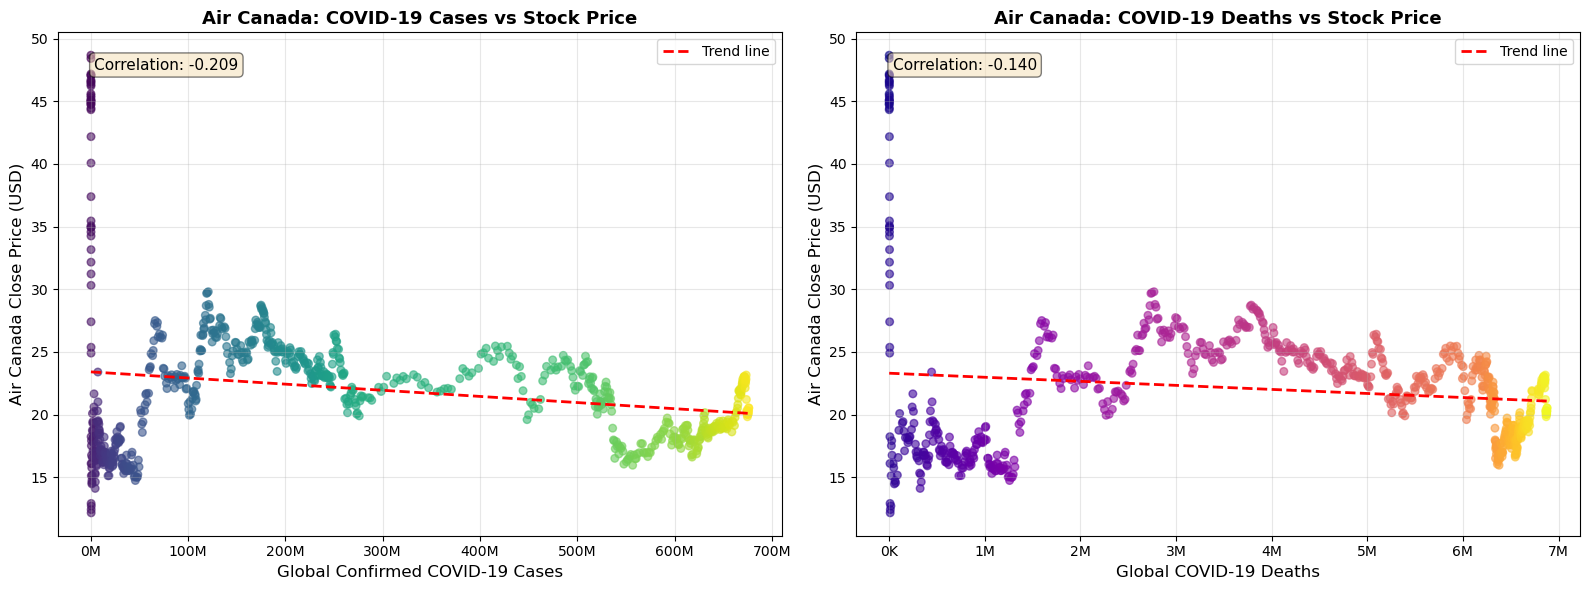


Air Canada Correlation Analysis:
  Confirmed Cases vs Close Price: -0.2089
  Deaths vs Close Price: -0.1404
  Data points: 785
  Date range: 2020-01-22 to 2023-03-08


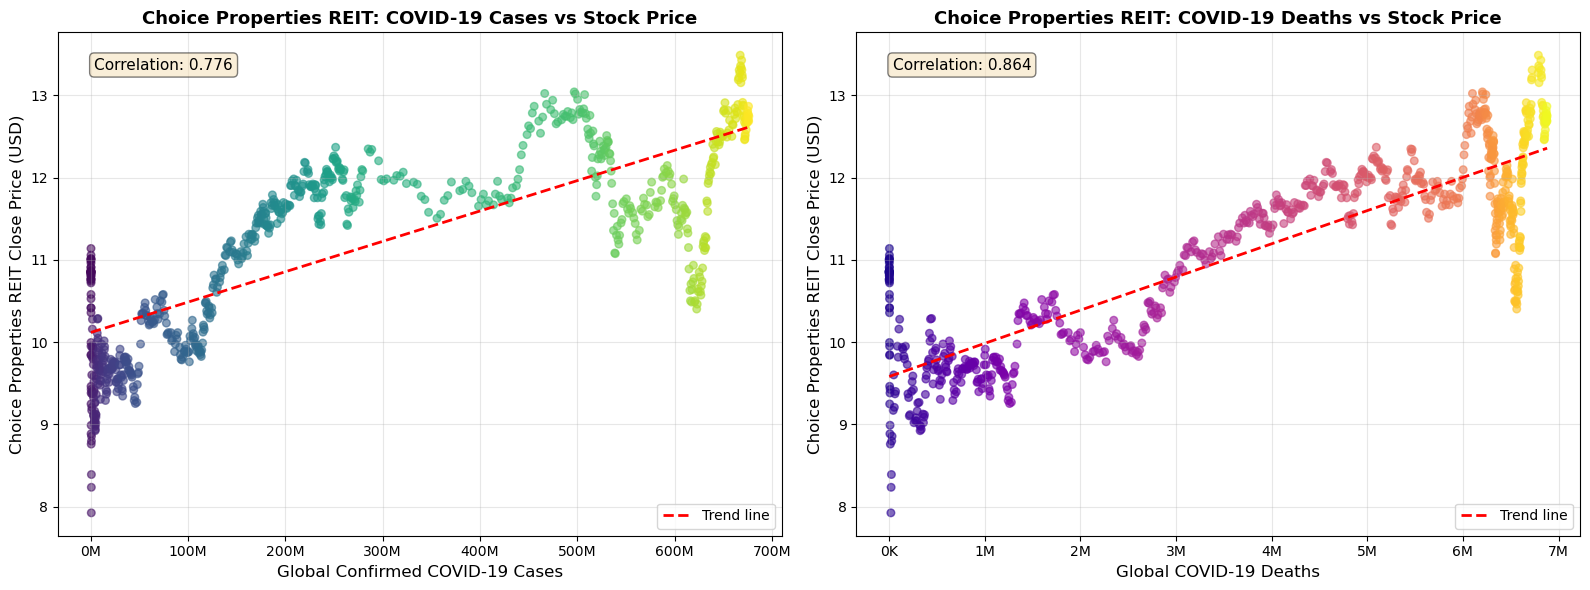


Choice Properties REIT Correlation Analysis:
  Confirmed Cases vs Close Price: 0.7763
  Deaths vs Close Price: 0.8637
  Data points: 785
  Date range: 2020-01-22 to 2023-03-08


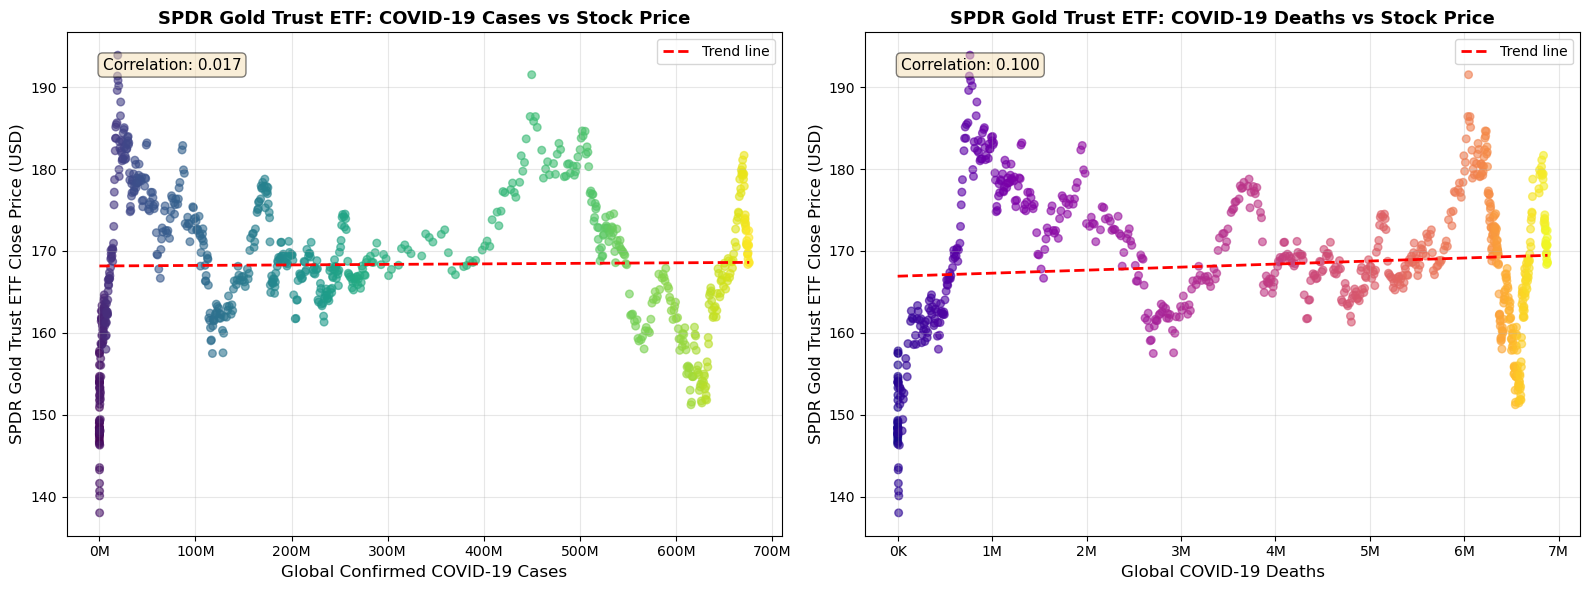


SPDR Gold Trust ETF Correlation Analysis:
  Confirmed Cases vs Close Price: 0.0170
  Deaths vs Close Price: 0.0995
  Data points: 788
  Date range: 2020-01-22 to 2023-03-08

CORRELATION SUMMARY - COVID-19 Impact on Stock Prices
Stock                          Cases vs Price       Deaths vs Price     
--------------------------------------------------------------------------------
S&P/TSX Composite index                    0.6545              0.8387
Pfizer                                     0.8053              0.8947
Canadian Tire                              0.7602              0.8415
Air Canada                                -0.2089             -0.1404
Choice Properties REIT                     0.7763              0.8637
SPDR Gold Trust ETF                        0.0170              0.0995


In [14]:
import numpy as np

# Prepare combined data with COVID-19 and stock prices
# Aggregate global COVID-19 data by date
global_covid = confirmed_cases_format.groupby('Date').agg({
    'Confirmed': 'sum'
}).reset_index()

global_covid_deaths = deaths_format.groupby('Date').agg({
    'Deaths': 'sum'
}).reset_index()

# Merge confirmed cases and deaths
global_covid = global_covid.merge(global_covid_deaths, on='Date', how='left')

# Create scatter plots for each stock
for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name].copy()
    
    # Handle column names
    high_col = 'High' if 'High' in stock_df.columns else f'High_{symbol}'
    low_col = 'Low' if 'Low' in stock_df.columns else f'Low_{symbol}'
    close_col = 'Close' if 'Close' in stock_df.columns else f'Close_{symbol}'
    
    # Reset index to make Date a column
    stock_df = stock_df.reset_index()
    stock_df.columns = ['Date'] + list(stock_df.columns[1:])
    
    # Merge with COVID data
    merged_df = stock_df.merge(global_covid, left_on='Date', right_on='Date', how='inner')
    
    if len(merged_df) == 0:
        print(f"No matching dates for {stock_name}")
        continue
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Scatter plot 1: Confirmed Cases vs Stock Price (Close)
    scatter1 = ax1.scatter(merged_df['Confirmed'], merged_df[close_col], 
                          c=merged_df.index, cmap='viridis', alpha=0.6, s=30)
    ax1.set_xlabel('Global Confirmed COVID-19 Cases', fontsize=12)
    ax1.set_ylabel(f'{stock_name} Close Price (USD)', fontsize=12)
    ax1.set_title(f'{stock_name}: COVID-19 Cases vs Stock Price', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    correlation1 = merged_df['Confirmed'].corr(merged_df[close_col])
    ax1.text(0.05, 0.95, f'Correlation: {correlation1:.3f}', 
             transform=ax1.transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Add trend line
    z1 = np.polyfit(merged_df['Confirmed'], merged_df[close_col], 1)
    p1 = np.poly1d(z1)
    ax1.plot(merged_df['Confirmed'], p1(merged_df['Confirmed']), 
             "r--", linewidth=2, label=f'Trend line')
    ax1.legend()
    
    # Format x-axis with comma separators
    ax1.ticklabel_format(style='plain', axis='x')
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x/1e6):.0f}M'))
    
    # Scatter plot 2: Deaths vs Stock Price (Close)
    scatter2 = ax2.scatter(merged_df['Deaths'], merged_df[close_col], 
                          c=merged_df.index, cmap='plasma', alpha=0.6, s=30)
    ax2.set_xlabel('Global COVID-19 Deaths', fontsize=12)
    ax2.set_ylabel(f'{stock_name} Close Price (USD)', fontsize=12)
    ax2.set_title(f'{stock_name}: COVID-19 Deaths vs Stock Price', fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    correlation2 = merged_df['Deaths'].corr(merged_df[close_col])
    ax2.text(0.05, 0.95, f'Correlation: {correlation2:.3f}', 
             transform=ax2.transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Add trend line
    z2 = np.polyfit(merged_df['Deaths'], merged_df[close_col], 1)
    p2 = np.poly1d(z2)
    ax2.plot(merged_df['Deaths'], p2(merged_df['Deaths']), 
             "r--", linewidth=2, label=f'Trend line')
    ax2.legend()
    
    # Format x-axis with comma separators
    ax2.ticklabel_format(style='plain', axis='x')
    ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x/1e6):.0f}M' if x >= 1e6 else f'{int(x/1e3):.0f}K'))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{stock_name} Correlation Analysis:")
    print(f"  Confirmed Cases vs Close Price: {correlation1:.4f}")
    print(f"  Deaths vs Close Price: {correlation2:.4f}")
    print(f"  Data points: {len(merged_df)}")
    print(f"  Date range: {merged_df['Date'].min().strftime('%Y-%m-%d')} to {merged_df['Date'].max().strftime('%Y-%m-%d')}")

# Summary of all correlations
print("\n" + "="*80)
print("CORRELATION SUMMARY - COVID-19 Impact on Stock Prices")
print("="*80)
print(f"{'Stock':<30} {'Cases vs Price':<20} {'Deaths vs Price':<20}")
print("-"*80)

for stock_name, symbol in stocks.items():
    stock_df = stock_data_filtered[stock_data_filtered['Stock'] == stock_name].copy()
    close_col = 'Close' if 'Close' in stock_df.columns else f'Close_{symbol}'
    
    stock_df = stock_df.reset_index()
    stock_df.columns = ['Date'] + list(stock_df.columns[1:])
    merged_df = stock_df.merge(global_covid, left_on='Date', right_on='Date', how='inner')
    
    if len(merged_df) > 0:
        corr_cases = merged_df['Confirmed'].corr(merged_df[close_col])
        corr_deaths = merged_df['Deaths'].corr(merged_df[close_col])
        print(f"{stock_name:<30} {corr_cases:>18.4f}  {corr_deaths:>18.4f}")


5. Bar Charts:
  - Compare the average stock price movements during different phases of the pandemic (e.g., initial outbreak, peak, recovery).


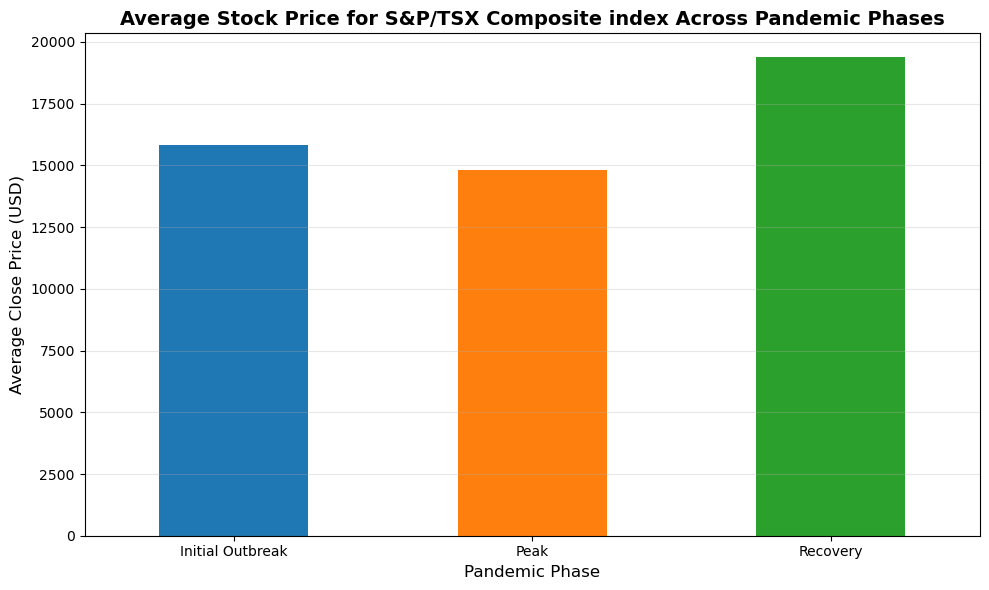

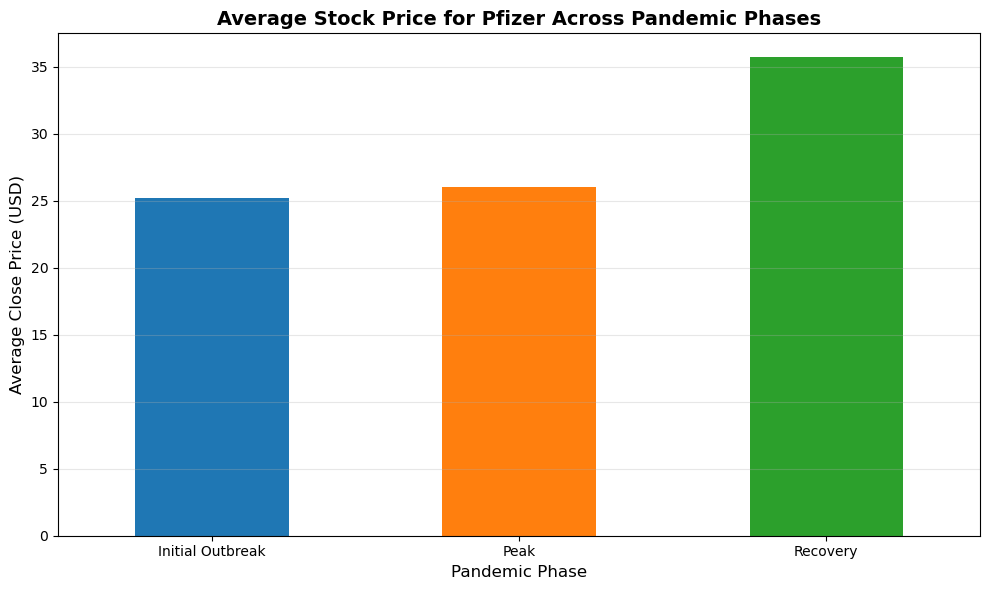

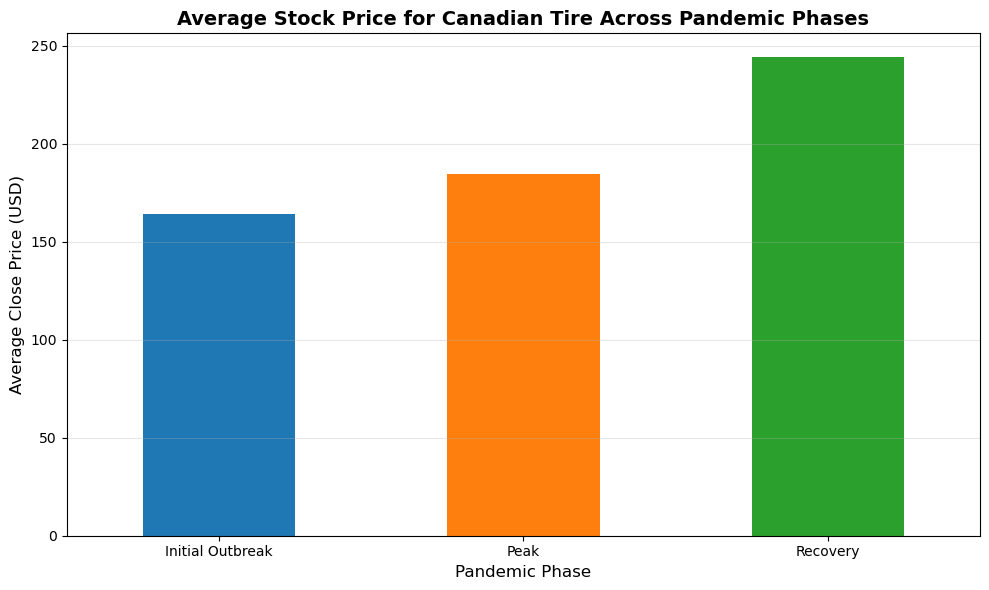

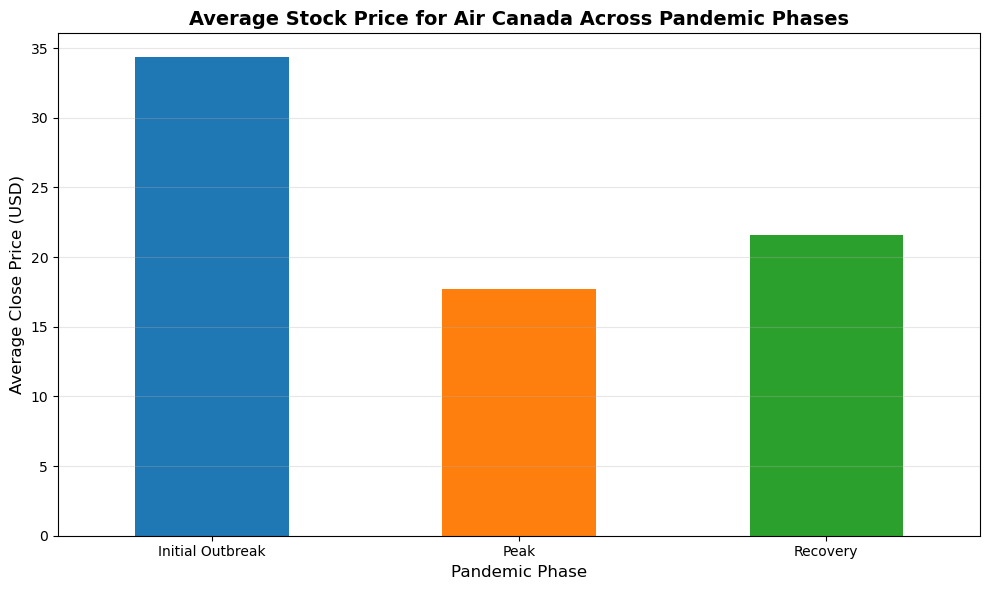

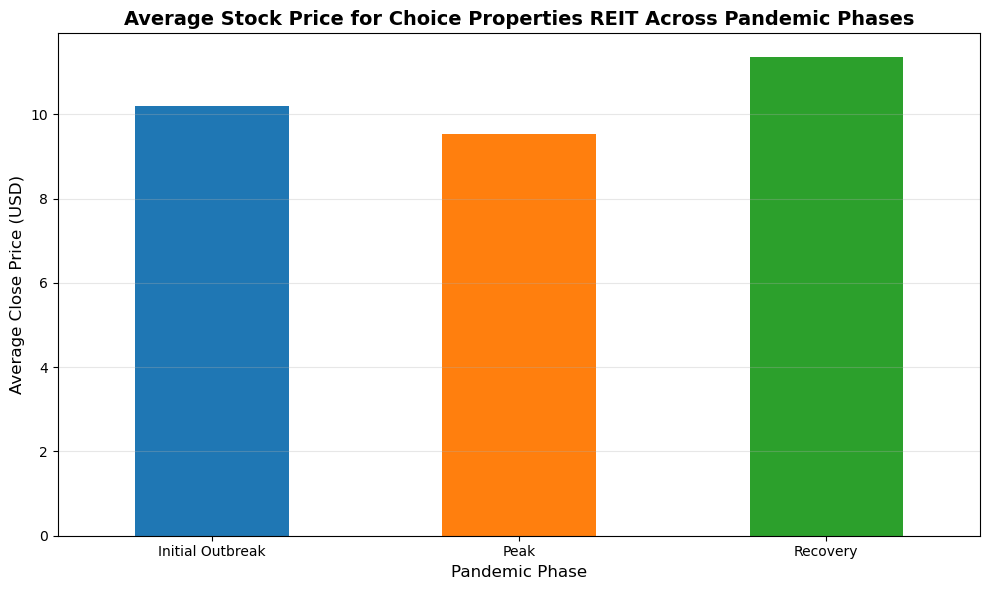

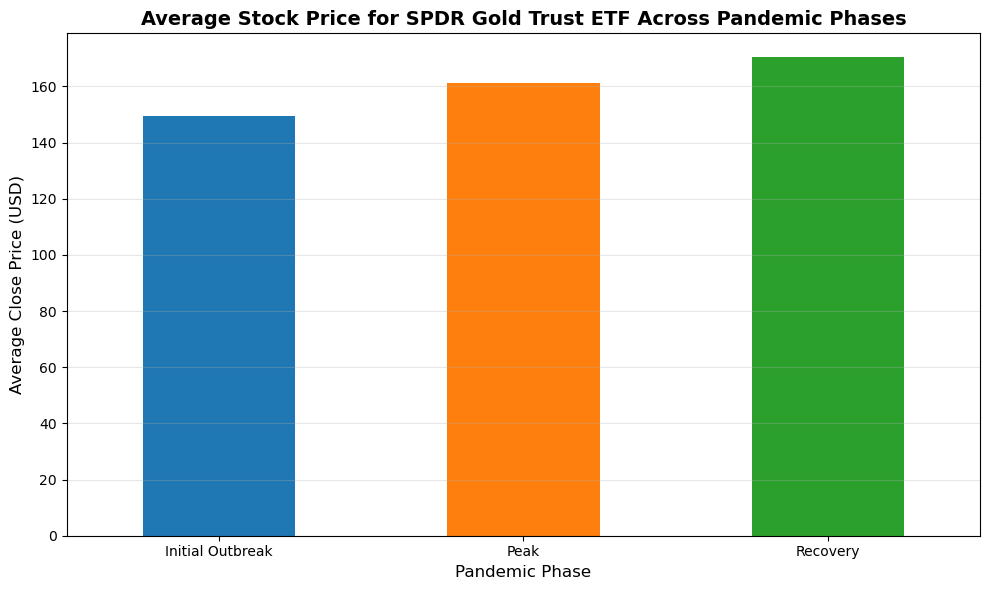

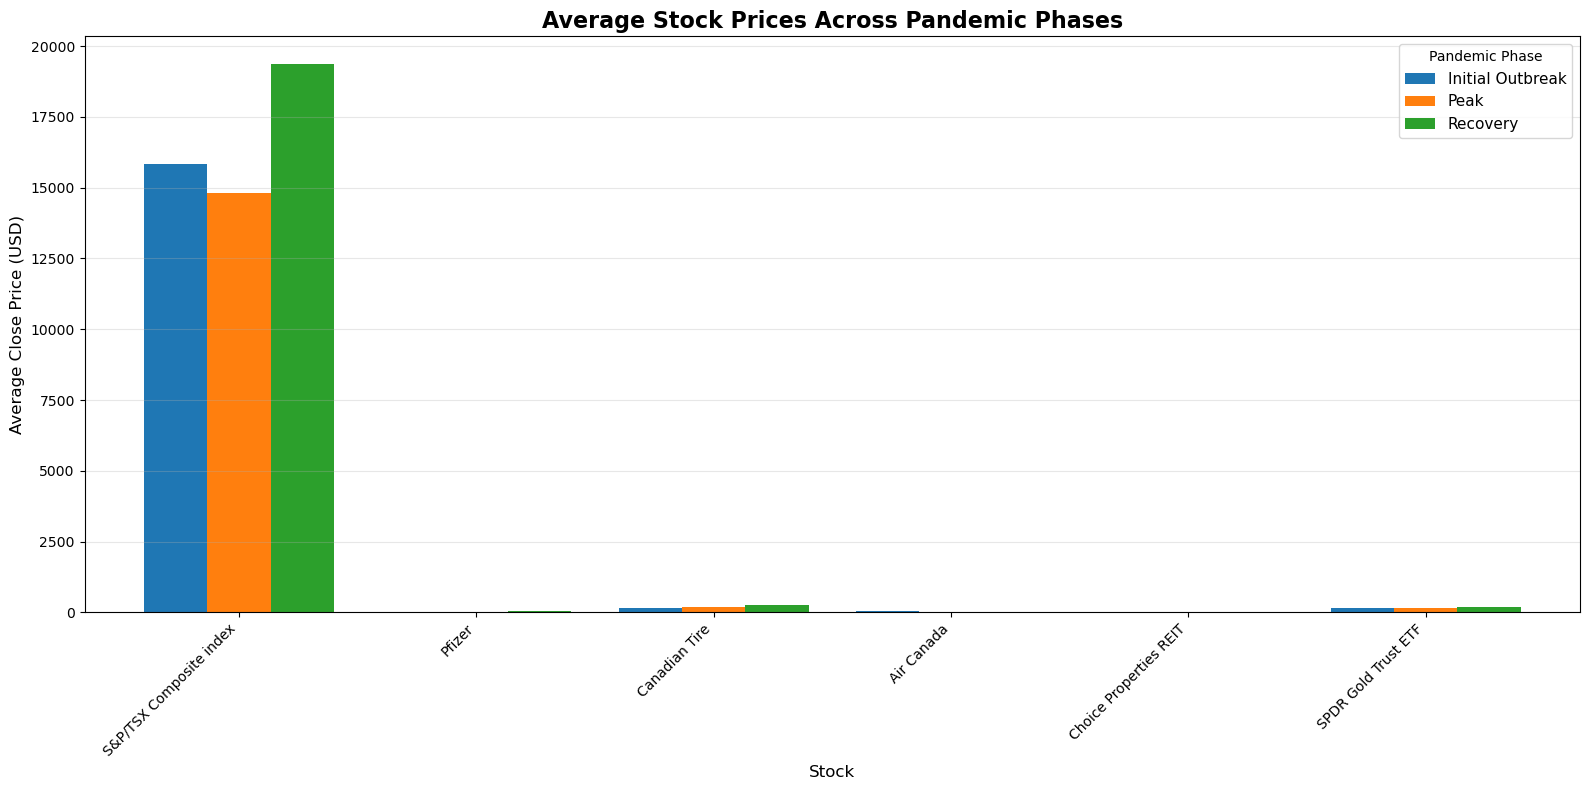

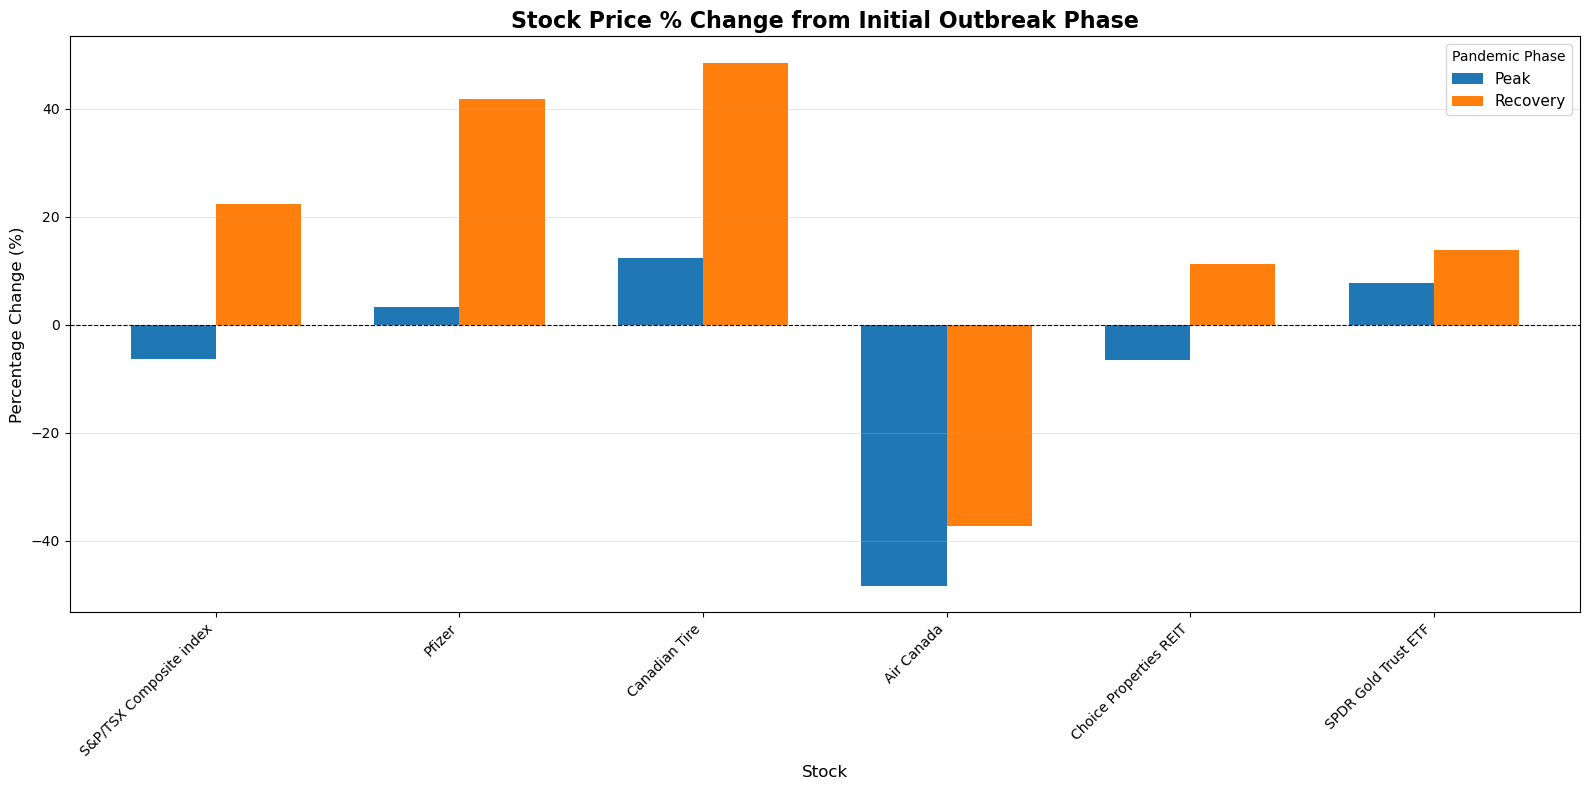


Average Stock Prices Across Pandemic Phases:
                         Initial Outbreak          Peak      Recovery
S&P/TSX Composite index      15837.128627  14827.890485  19380.078917
Pfizer                          25.173965     25.990750     35.694516
Canadian Tire                  164.348771    184.799030    244.237619
Air Canada                      34.336530     17.721746     21.558158
Choice Properties REIT          10.203495      9.545097     11.356420
SPDR Gold Trust ETF            149.566938    161.285713    170.366035

Percentage Change from Initial Outbreak Phase (%):
                              Peak   Recovery
S&P/TSX Composite index  -6.372608  22.371166
Pfizer                    3.244561  41.791394
Canadian Tire            12.443207  48.609337
Air Canada              -48.388070 -37.215097
Choice Properties REIT   -6.452665  11.299317
SPDR Gold Trust ETF       7.835137  13.906213


In [15]:
# 5. Bar Charts:
# Compare the average stock price movements during different phases of the pandemic

import numpy as np

# Define pandemic phases based on global COVID-19 trends
phases = {
    'Initial Outbreak': ('2020-01-22', '2020-03-31'),      # Early pandemic emergence
    'Peak': ('2020-04-01', '2020-06-30'),                  # First wave peak period
    'Recovery': ('2020-07-01', '2023-03-09')               # Recovery phase through end of data
}

# Calculate average stock prices for each phase
phase_avg_prices = {}
for phase, (start, end) in phases.items():
    phase_df = stock_data_filtered[(stock_data_filtered.index >= start) & (stock_data_filtered.index <= end)]
    
    avg_prices = {}
    for stock_name, symbol in stocks.items():
        stock_df = phase_df[phase_df['Stock'] == stock_name]
        close_col = 'Close' if 'Close' in stock_df.columns else f'Close_{symbol}'
        
        if not stock_df.empty:
            avg_prices[stock_name] = stock_df[close_col].mean()
        else:
            avg_prices[stock_name] = 0  # Handle cases with no data
            
    phase_avg_prices[phase] = avg_prices

# Convert to DataFrame for easier plotting
phase_df = pd.DataFrame(phase_avg_prices)

# --- Visualization 1: Average Price per Phase for Each Stock ---
for stock_name in stocks.keys():
    if stock_name in phase_df.index:
        plt.figure(figsize=(10, 6))
        phase_df.loc[stock_name].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], rot=0)
        plt.title(f'Average Stock Price for {stock_name} Across Pandemic Phases', fontsize=14, fontweight='bold')
        plt.xlabel('Pandemic Phase', fontsize=12)
        plt.ylabel('Average Close Price (USD)', fontsize=12)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()

# --- Visualization 2: Grouped Bar Chart Comparing All Stocks ---
phase_df.plot(kind='bar', figsize=(16, 8), width=0.8)
plt.title('Average Stock Prices Across Pandemic Phases', fontsize=16, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Average Close Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pandemic Phase', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# --- Visualization 3: Percentage Change from Initial Outbreak ---
# Calculate percentage change relative to the 'Initial Outbreak' phase
initial_prices = phase_df['Initial Outbreak']
percentage_change_df = phase_df.apply(lambda x: (x - initial_prices) / initial_prices * 100, axis=0)

# Drop the 'Initial Outbreak' column as it will be all zeros
percentage_change_df = percentage_change_df.drop(columns=['Initial Outbreak'])

percentage_change_df.plot(kind='bar', figsize=(16, 8), width=0.7)
plt.title('Stock Price % Change from Initial Outbreak Phase', fontsize=16, fontweight='bold')
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') # Zero line
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pandemic Phase', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print the data
print("\nAverage Stock Prices Across Pandemic Phases:")
print(phase_df)
print("\nPercentage Change from Initial Outbreak Phase (%):")
print(percentage_change_df)

6. Candlestick charts:
  - Create candlestick charts to display the daily price movement (open, high, low, close).
(If open/close prices are not available, you may derive or approximate them as needed.)


Creating candlestick chart for S&P/TSX Composite index with 785 data points...


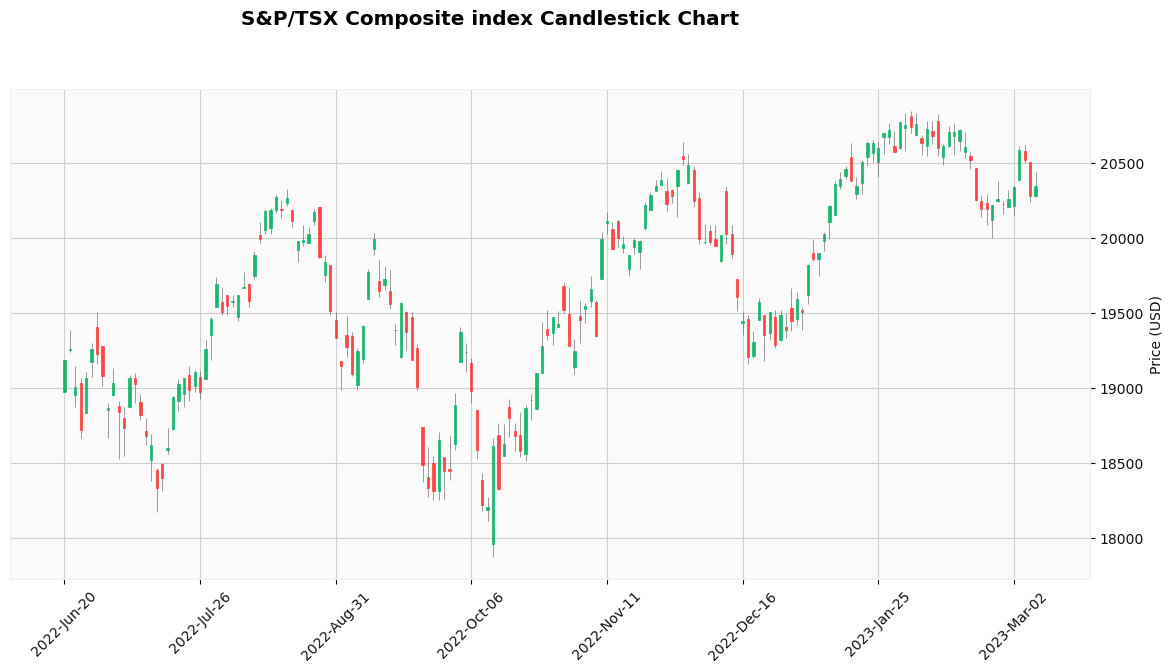

Creating candlestick chart for Pfizer with 788 data points...


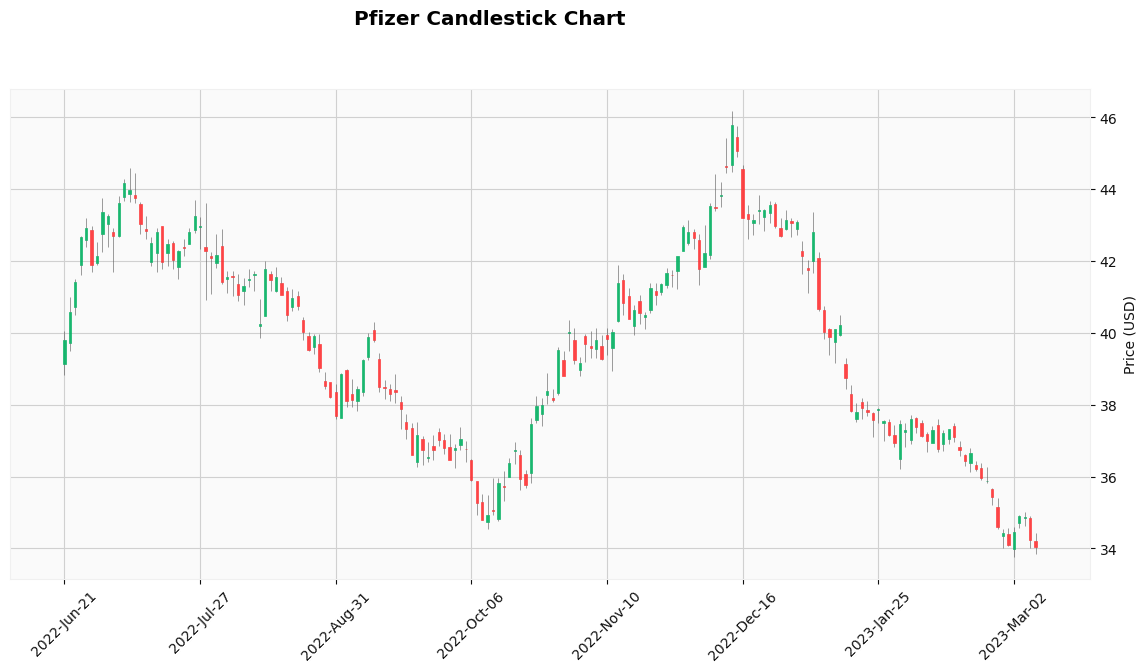

Creating candlestick chart for Canadian Tire with 785 data points...


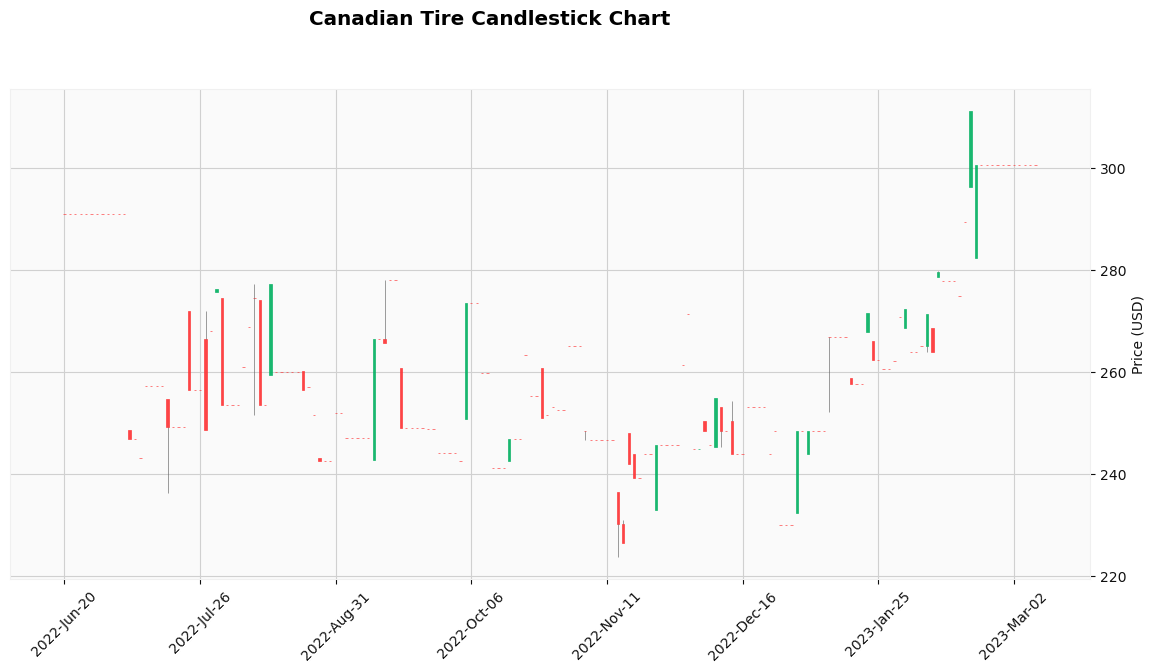

Creating candlestick chart for Air Canada with 785 data points...


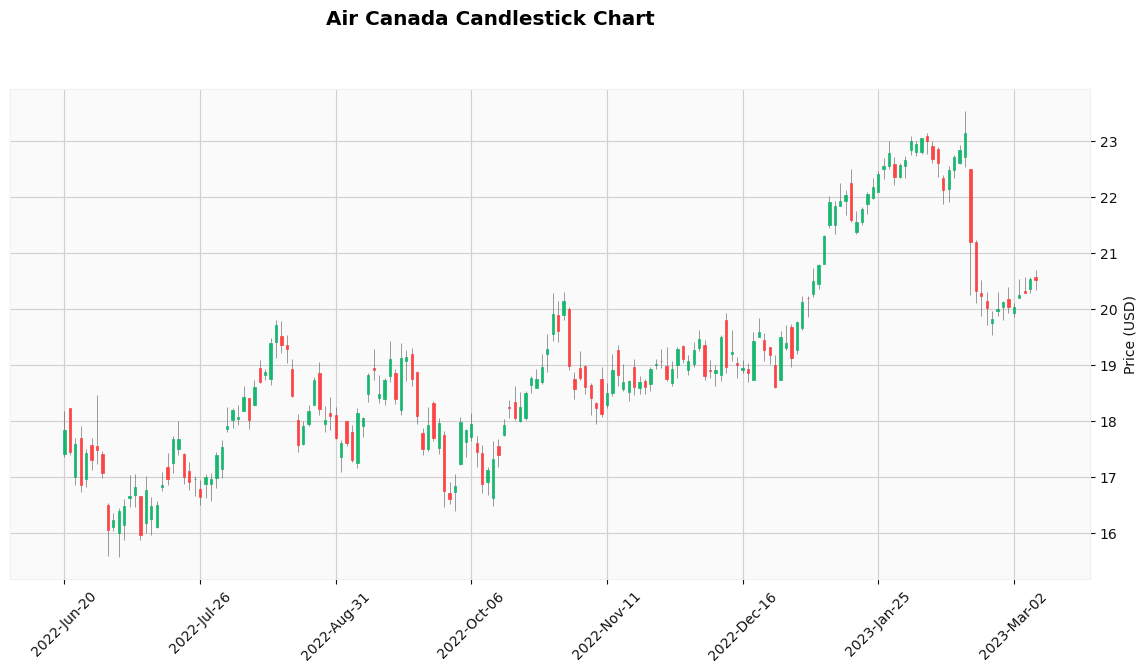

Creating candlestick chart for Choice Properties REIT with 785 data points...


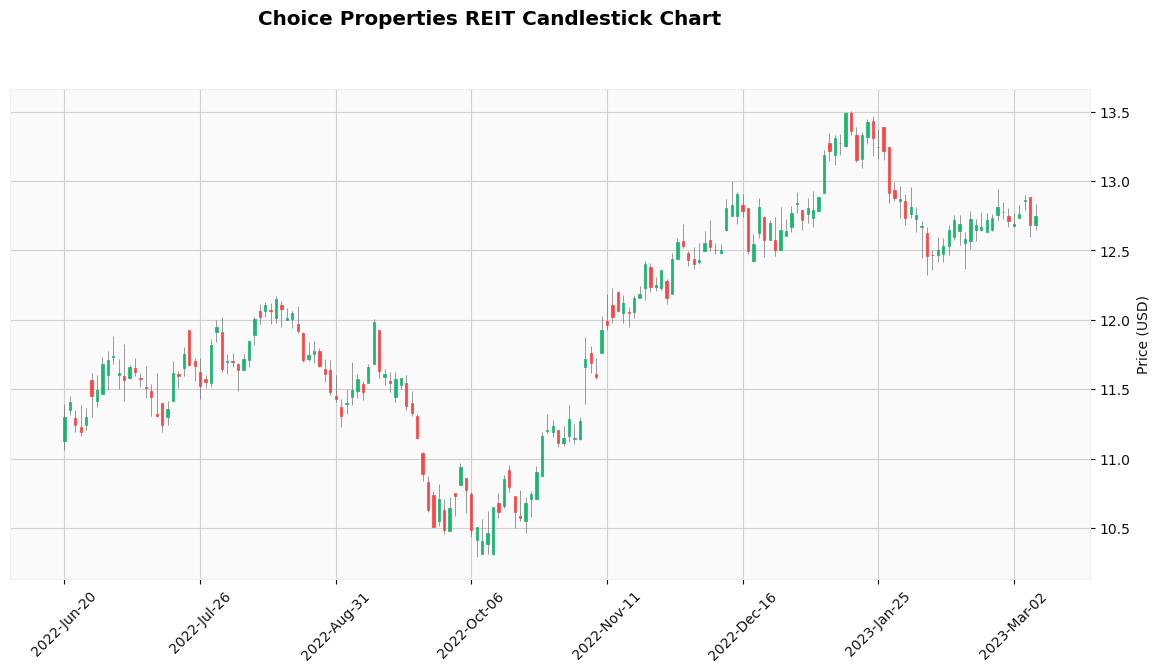

Creating candlestick chart for SPDR Gold Trust ETF with 788 data points...


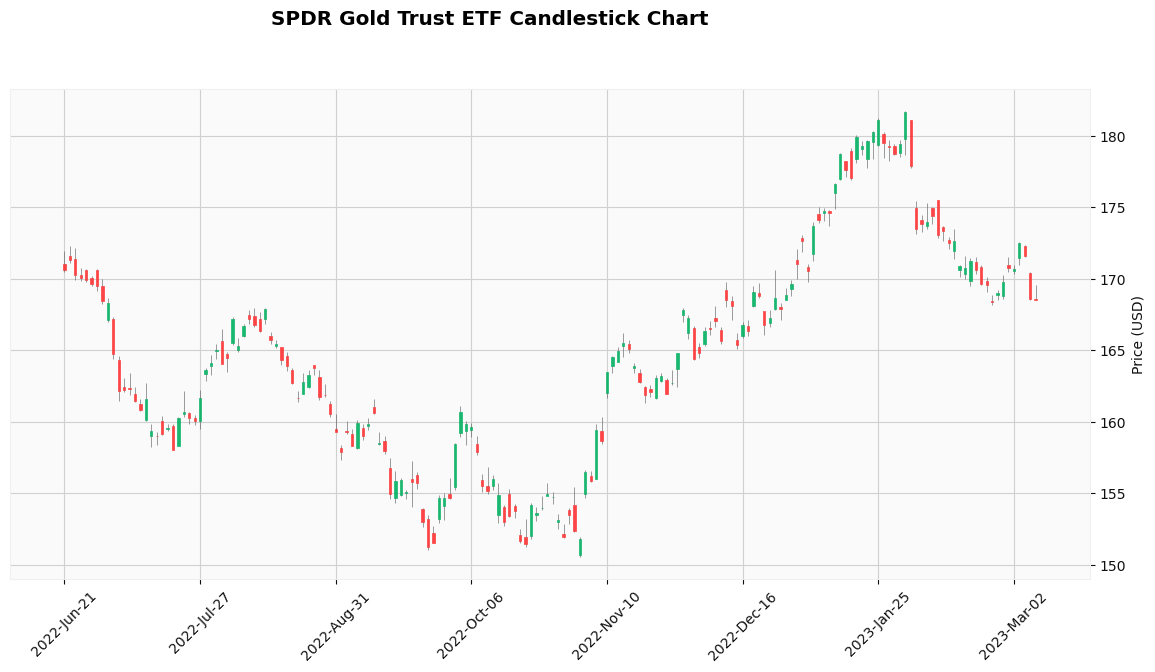

In [16]:
for stock_name, symbol in stocks.items():
    # Filter stock_data for the current stock
    chart_df = stock_data[stock_data['Stock'] == stock_name].copy()
    
    # Ensure the dataframe is not empty
    if chart_df.empty:
        print(f"No data available for {stock_name} to create a candlestick chart.")
        continue
    
    # Flatten multi-level columns if present
    if isinstance(chart_df.columns, pd.MultiIndex):
        chart_df.columns = ['_'.join(col).strip('_') for col in chart_df.columns.values]
    
    # Select the required columns with the correct naming convention
    open_col = f'Open_{symbol}' if f'Open_{symbol}' in chart_df.columns else 'Open'
    high_col = f'High_{symbol}' if f'High_{symbol}' in chart_df.columns else 'High'
    low_col = f'Low_{symbol}' if f'Low_{symbol}' in chart_df.columns else 'Low'
    close_col = f'Close_{symbol}' if f'Close_{symbol}' in chart_df.columns else 'Close'
    
    # Create a new dataframe with standard column names for mplfinance
    required_cols = ['Open', 'High', 'Low', 'Close']
    chart_df = pd.DataFrame({
        'Open': chart_df[open_col].values,
        'High': chart_df[high_col].values,
        'Low': chart_df[low_col].values,
        'Close': chart_df[close_col].values
    }, index=chart_df.index)
    
    # Ensure all required columns are numeric and clean
    for col in required_cols:
        chart_df[col] = pd.to_numeric(chart_df[col], errors='coerce')
    
    # Remove any rows with NaN values in critical columns
    chart_df = chart_df.dropna(subset=required_cols)
    
    print(f"Creating candlestick chart for {stock_name} with {len(chart_df)} data points...")
    
    # Create the candlestick chart using a subset for readability
    mpf.plot(chart_df.tail(180),
             type='candle',
             style='yahoo',
             title=f'{stock_name} Candlestick Chart',
             ylabel='Price (USD)',
             figsize=(15, 7))